# Villes: traitement de données avec pandas et outils GIS

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import shapely as shp
import contextily as ctx

## Création d'un DataFrame

### avec une fonction de lecture
fonction read_XYZ:
- csv
- json
- sql (requête ou table)
- xml
- excel
- ...

In [5]:
dtypes = {
    'code_insee': str, 'nom_standard': str, 'nom_sans_pronom': str, 'nom_a': str, 'nom_de': str, 'nom_sans_accent': str, 'nom_standard_majuscule': str,
    'typecom': str, 'typecom_texte': str, 'reg_code': str, 'reg_nom': str, 
    'dep_code': str, 'dep_nom': str, 'canton_code': str, 
    'canton_nom': str, 'epci_code': str, 'epci_nom': str, 
    'code_postal': str, 'codes_postaux': str, 'academie_code': str, 'academie_nom': str, 
    'zone_emploi': str, 'code_insee_centre_zone_emploi': str, 
        #'population': int, 
    'population': 'uint32', 
    'superficie_hectare': float, 'superficie_km2': float, 'densite': float, 'altitude_moyenne': float, 'altitude_minimale': float, 'altitude_maximale': float, 'latitude_mairie': float, 'longitude_mairie': float, 'latitude_centre': float, 'latitude_centre': float, 'grille_densite': str, 'gentile': str, 'url_wikipedia': str, 'url_villedereve': str,
    'code_unite_urbaine': str
}
df_cities =  pd.read_csv('data/communes_france_2025.csv', dtype=dtypes, index_col=0)
df_cities

,code_insee,nom_standard,nom_sans_pronom,nom_a,nom_de,nom_sans_accent,nom_standard_majuscule,typecom,typecom_texte,reg_code,...,longitude_mairie,latitude_centre,longitude_centre,grille_densite,grille_densite_texte,niveau_equipements_services,niveau_equipements_services_texte,gentile,url_wikipedia,url_villedereve
0,01001,L'Abergement-Clémenciat,Abergement-Clémenciat,à Abergement-Clémenciat,de l'Abergement-Clémenciat,l-abergement-clemenciat,L'ABERGEMENT-CLÉMENCIAT,COM,commune,84,...,4.921,46.153,4.926,6,Rural à habitat dispersé,0.0,communes non pôle,NaN,https://fr.wikipedia.org/wiki/fr:L'Abergement-...,https://villedereve.fr/ville/01001-l-abergemen...
1,01002,L'Abergement-de-Varey,Abergement-de-Varey,à Abergement-de-Varey,de l'Abergement-de-Varey,l-abergement-de-varey,L'ABERGEMENT-DE-VAREY,COM,commune,84,...,5.423,46.009,5.428,6,Rural à habitat dispersé,0.0,communes non pôle,"Abergementais, Abergementaises",https://fr.wikipedia.org/wiki/fr:L'Abergement-...,https://villedereve.fr/ville/01002-l-abergemen...
2,01004,Ambérieu-en-Bugey,Ambérieu-en-Bugey,à Ambérieu-en-Bugey,d'Ambérieu-en-Bugey,amberieu-en-bugey,AMBÉRIEU-EN-BUGEY,COM,commune,84,...,5.360,45.961,5.373,2,Centres urbains intermédiaires,3.0,centres structurants d'équipements et de services,"Ambarrois, Ambarroises",https://fr.wikipedia.org/wiki/fr:Ambérieu-en-B...,https://villedereve.fr/ville/01004-amberieu-en...
3,01005,Ambérieux-en-Dombes,Ambérieux-en-Dombes,à Ambérieux-en-Dombes,d'Ambérieux-en-Dombes,amberieux-en-dombes,AMBÉRIEUX-EN-DOMBES,COM,commune,84,...,4.903,45.996,4.912,5,Bourgs ruraux,1.0,centres locaux d'équipements et de services,Ambarrois,https://fr.wikipedia.org/wiki/fr:Ambérieux-en-...,https://villedereve.fr/ville/01005-amberieux-e...
4,01006,Ambléon,Ambléon,à Ambléon,d'Ambléon,ambleon,AMBLÉON,COM,commune,84,...,5.601,45.750,5.594,6,Rural à habitat dispersé,0.0,communes non pôle,Ambléonais,https://fr.wikipedia.org/wiki/fr:Ambléon,https://villedereve.fr/ville/01006-ambleon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34930,97613,M'Tsangamouji,M'Tsangamouji,à M'Tsangamouji,de M'Tsangamouji,m-tsangamouji,M'TSANGAMOUJI,COM,commune,6,...,45.084,-12.751,45.087,3,Petites villes,NaN,NaN,NaN,https://fr.wikipedia.org/wiki/fr:M'Tsangamouji,https://villedereve.fr/ville/97613-m-tsangamouji
34931,97614,Ouangani,Ouangani,à Ouangani,d'Ouangani,ouangani,OUANGANI,COM,commune,6,...,45.139,-12.837,45.138,3,Petites villes,NaN,NaN,NaN,https://fr.wikipedia.org/wiki/fr:Ouangani,https://villedereve.fr/ville/97614-ouangani
34932,97615,Pamandzi,Pamandzi,à Pamandzi,de Pamandzi,pamandzi,PAMANDZI,COM,commune,6,...,45.275,-12.796,45.284,2,Centres urbains intermédiaires,NaN,NaN,Pamandziens,https://fr.wikipedia.org/wiki/fr:Pamandzi,https://villedereve.fr/ville/97615-pamandzi
34933,97616,Sada,Sada,à Sada,de Sada,sada,SADA,COM,commune,6,...,45.106,-12.861,45.119,2,Centres urbains intermédiaires,NaN,NaN,Sadois,https://fr.wikipedia.org/wiki/fr:Sada (Mayotte),https://villedereve.fr/ville/97616-sada


In [6]:
type(df_cities)

pandas.core.frame.DataFrame

In [7]:
df_cities.columns

Index(['code_insee', 'nom_standard', 'nom_sans_pronom', 'nom_a', 'nom_de',
       'nom_sans_accent', 'nom_standard_majuscule', 'typecom', 'typecom_texte',
       'reg_code', 'reg_nom', 'dep_code', 'dep_nom', 'canton_code',
       'canton_nom', 'epci_code', 'epci_nom', 'academie_code', 'academie_nom',
       'code_postal', 'codes_postaux', 'zone_emploi',
       'code_insee_centre_zone_emploi', 'code_unite_urbaine',
       'nom_unite_urbaine', 'taille_unite_urbaine',
       'type_commune_unite_urbaine', 'statut_commune_unite_urbaine',
       'population', 'superficie_hectare', 'superficie_km2', 'densite',
       'altitude_moyenne', 'altitude_minimale', 'altitude_maximale',
       'latitude_mairie', 'longitude_mairie', 'latitude_centre',
       'longitude_centre', 'grille_densite', 'grille_densite_texte',
       'niveau_equipements_services', 'niveau_equipements_services_texte',
       'gentile', 'url_wikipedia', 'url_villedereve'],
      dtype='object')

In [8]:
df_cities.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34935 entries, 0 to 34934
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   code_insee                         34935 non-null  object 
 1   nom_standard                       34935 non-null  object 
 2   nom_sans_pronom                    34935 non-null  object 
 3   nom_a                              34935 non-null  object 
 4   nom_de                             34935 non-null  object 
 5   nom_sans_accent                    34935 non-null  object 
 6   nom_standard_majuscule             34935 non-null  object 
 7   typecom                            34935 non-null  object 
 8   typecom_texte                      34935 non-null  object 
 9   reg_code                           34935 non-null  object 
 10  reg_nom                            34935 non-null  object 
 11  dep_code                           34935 non-null  object 


In [9]:
df_cities.describe()

,taille_unite_urbaine,population,superficie_hectare,superficie_km2,densite,altitude_moyenne,altitude_minimale,altitude_maximale,latitude_mairie,longitude_mairie,latitude_centre,longitude_centre,niveau_equipements_services
count,34932.000000,3.493500e+04,3.493500e+04,34935.000000,34932.000000,34935.000000,34935.000000,34935.000000,34935.000000,34935.000000,34926.000000,34926.000000,34803.000000
mean,0.799582,1.936405e+03,1.763584e+03,17.633519,169.279056,279.172606,188.710405,384.897782,46.787217,2.714014,46.786757,2.714199,0.447145
std,1.884986,1.498968e+04,1.481510e+04,148.150222,752.070774,288.589425,201.561722,452.958268,3.586378,4.410897,3.588029,4.411771,0.767822
min,0.000000,0.000000e+00,2.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-21.379000,-61.794000,-21.340000,-61.780000,0.000000
25%,0.000000,1.970000e+02,6.490000e+02,6.000000,18.000000,105.000000,55.000000,132.000000,45.070000,0.793500,45.069000,0.793000,0.000000
50%,0.000000,4.570000e+02,1.088000e+03,11.000000,41.000000,189.000000,134.000000,231.000000,47.351000,2.718000,47.353000,2.718000,0.000000
75%,0.000000,1.164000e+03,1.867000e+03,19.000000,100.000000,337.000000,252.000000,436.500000,48.824000,4.915500,48.823000,4.918000,1.000000
max,8.000000,2.133111e+06,1.871833e+06,18718.000000,28220.000000,2713.000000,9589.000000,4808.000000,51.071000,55.793000,51.073000,55.754000,4.000000


### avec le constructeur

In [11]:
# NB: construire un DataFrame à partir de données Python
df = pd.DataFrame([['Montpellier', 34], ['Pau', 64]], columns=['Nom', 'Département'])
df

,Nom,Département
0,Montpellier,34
1,Pau,64


In [12]:
df = pd.DataFrame([
    {'Nom': 'Montpellier', 'Département': 34},
    {'Nom': 'Pau', 'Département': 64}
])
df

,Nom,Département
0,Montpellier,34
1,Pau,64


## Accès à la donnée

### par colonne

In [15]:
col = df_cities['nom_standard']
col

0        L'Abergement-Clémenciat
1          L'Abergement-de-Varey
2              Ambérieu-en-Bugey
3            Ambérieux-en-Dombes
4                        Ambléon
                  ...           
34930              M'Tsangamouji
34931                   Ouangani
34932                   Pamandzi
34933                       Sada
34934                   Tsingoni
Name: nom_standard, Length: 34935, dtype: object

In [16]:
type(col)

pandas.core.series.Series

In [17]:
# ou par attribut (Warning! pas toujours possible)
df_cities.nom_standard

0        L'Abergement-Clémenciat
1          L'Abergement-de-Varey
2              Ambérieu-en-Bugey
3            Ambérieux-en-Dombes
4                        Ambléon
                  ...           
34930              M'Tsangamouji
34931                   Ouangani
34932                   Pamandzi
34933                       Sada
34934                   Tsingoni
Name: nom_standard, Length: 34935, dtype: object

In [18]:
# 2+ colonnes
df_cities[['nom_standard', 'dep_code']]

,nom_standard,dep_code
0,L'Abergement-Clémenciat,01
1,L'Abergement-de-Varey,01
2,Ambérieu-en-Bugey,01
3,Ambérieux-en-Dombes,01
4,Ambléon,01
...,...,...
34930,M'Tsangamouji,976
34931,Ouangani,976
34932,Pamandzi,976
34933,Sada,976


In [19]:
columns = ['nom_standard', 'dep_code', 'dep_nom', 'population']
df_cities[columns]

,nom_standard,dep_code,dep_nom,population
0,L'Abergement-Clémenciat,01,Ain,832
1,L'Abergement-de-Varey,01,Ain,267
2,Ambérieu-en-Bugey,01,Ain,14854
3,Ambérieux-en-Dombes,01,Ain,1897
4,Ambléon,01,Ain,113
...,...,...,...,...
34930,M'Tsangamouji,976,Mayotte,6432
34931,Ouangani,976,Mayotte,10203
34932,Pamandzi,976,Mayotte,11442
34933,Sada,976,Mayotte,11156


### par ligne (.loc)

In [21]:
# avec son index => Series
ligne = df_cities.loc[0]
ligne

code_insee                                                                       01001
nom_standard                                                   L'Abergement-Clémenciat
nom_sans_pronom                                                  Abergement-Clémenciat
nom_a                                                          à Abergement-Clémenciat
nom_de                                                      de l'Abergement-Clémenciat
nom_sans_accent                                                l-abergement-clemenciat
nom_standard_majuscule                                         L'ABERGEMENT-CLÉMENCIAT
typecom                                                                            COM
typecom_texte                                                                  commune
reg_code                                                                            84
reg_nom                                                           Auvergne-Rhône-Alpes
dep_code                                   

In [22]:
type(ligne)

pandas.core.series.Series

In [23]:
# 1 info de la ligne
ligne['nom_standard']

"L'Abergement-Clémenciat"

In [24]:
# raccourci attribut (si dispo)
ligne.nom_standard

"L'Abergement-Clémenciat"

In [25]:
# localisation par tuple (index + nom de colonne)
df_cities.loc[0, 'nom_standard']

"L'Abergement-Clémenciat"

In [26]:
# df_cities.loc[40_000, 'nom_standard']
# KeyError: 40000

In [27]:
df_cities.loc[0, columns]

nom_standard    L'Abergement-Clémenciat
dep_code                             01
dep_nom                             Ain
population                          832
Name: 0, dtype: object

In [28]:
df_cities.loc[
    # lignes
    0, 
    # colonnes
    ['nom_standard', 'population']
]

nom_standard    L'Abergement-Clémenciat
population                          832
Name: 0, dtype: object

In [29]:
# slices avec .loc: 1er inclus, dernier inclus
df_cities.loc[10:20, ['nom_standard', 'population']]

,nom_standard,population
10,Aranc,327
11,Arandas,141
12,Arbent,3409
13,Arboys en Bugey,667
14,Arbigny,459
15,Argis,432
16,Armix,26
17,Ars-sur-Formans,1498
18,Artemare,1177
19,Asnières-sur-Saône,77


In [30]:
df_cities.columns

Index(['code_insee', 'nom_standard', 'nom_sans_pronom', 'nom_a', 'nom_de',
       'nom_sans_accent', 'nom_standard_majuscule', 'typecom', 'typecom_texte',
       'reg_code', 'reg_nom', 'dep_code', 'dep_nom', 'canton_code',
       'canton_nom', 'epci_code', 'epci_nom', 'academie_code', 'academie_nom',
       'code_postal', 'codes_postaux', 'zone_emploi',
       'code_insee_centre_zone_emploi', 'code_unite_urbaine',
       'nom_unite_urbaine', 'taille_unite_urbaine',
       'type_commune_unite_urbaine', 'statut_commune_unite_urbaine',
       'population', 'superficie_hectare', 'superficie_km2', 'densite',
       'altitude_moyenne', 'altitude_minimale', 'altitude_maximale',
       'latitude_mairie', 'longitude_mairie', 'latitude_centre',
       'longitude_centre', 'grille_densite', 'grille_densite_texte',
       'niveau_equipements_services', 'niveau_equipements_services_texte',
       'gentile', 'url_wikipedia', 'url_villedereve'],
      dtype='object')

In [31]:
# slices sur les 2 dimensions: ligne et colonne
df_cities.loc[10:20, 'nom_standard':'nom_standard_majuscule']

,nom_standard,nom_sans_pronom,nom_a,nom_de,nom_sans_accent,nom_standard_majuscule
10,Aranc,Aranc,à Aranc,d'Aranc,aranc,ARANC
11,Arandas,Arandas,à Arandas,d'Arandas,arandas,ARANDAS
12,Arbent,Arbent,à Arbent,d'Arbent,arbent,ARBENT
13,Arboys en Bugey,Arboys en Bugey,à Arboys en Bugey,d'Arboys en Bugey,arboys-en-bugey,ARBOYS EN BUGEY
14,Arbigny,Arbigny,à Arbigny,d'Arbigny,arbigny,ARBIGNY
15,Argis,Argis,à Argis,d'Argis,argis,ARGIS
16,Armix,Armix,à Armix,d'Armix,armix,ARMIX
17,Ars-sur-Formans,Ars-sur-Formans,à Ars-sur-Formans,d'Ars-sur-Formans,ars-sur-formans,ARS-SUR-FORMANS
18,Artemare,Artemare,à Artemare,d'Artemare,artemare,ARTEMARE
19,Asnières-sur-Saône,Asnières-sur-Saône,à Asnières-sur-Saône,d'Asnières-sur-Saône,asnieres-sur-saone,ASNIÈRES-SUR-SAÔNE


In [32]:
df_cities.loc[
    # lignes:
    [10, 15, 255], 
    # colonnes:
    ['nom_standard','population']
]

,nom_standard,population
10,Aranc,327
15,Argis,432
255,Pollieu,168


In [33]:
# expression intermédiaire
df_cities.dep_code == '34'

0        False
1        False
2        False
3        False
4        False
         ...  
34930    False
34931    False
34932    False
34933    False
34934    False
Name: dep_code, Length: 34935, dtype: bool

### filtre avec opérateur de comparaison
- ==, !=
- <, <=, >, >=

In [35]:
df_cities.loc[
    df_cities.dep_code == '34'
]

,code_insee,nom_standard,nom_sans_pronom,nom_a,nom_de,nom_sans_accent,nom_standard_majuscule,typecom,typecom_texte,reg_code,...,longitude_mairie,latitude_centre,longitude_centre,grille_densite,grille_densite_texte,niveau_equipements_services,niveau_equipements_services_texte,gentile,url_wikipedia,url_villedereve
12828,34001,Abeilhan,Abeilhan,à Abeilhan,d'Abeilhan,abeilhan,ABEILHAN,COM,commune,76,...,3.296,43.458,3.299,5,Bourgs ruraux,1.0,centres locaux d'équipements et de services,"Abeilhanais, Abeilhanaises",https://fr.wikipedia.org/wiki/fr:Abeilhan,https://villedereve.fr/ville/34001-abeilhan
12829,34002,Adissan,Adissan,à Adissan,d'Adissan,adissan,ADISSAN,COM,commune,76,...,3.428,43.536,3.426,5,Bourgs ruraux,1.0,centres locaux d'équipements et de services,Adissanais,https://fr.wikipedia.org/wiki/fr:Adissan,https://villedereve.fr/ville/34002-adissan
12830,34003,Agde,Agde,à Agde,d'Agde,agde,AGDE,COM,commune,76,...,3.478,43.309,3.484,2,Centres urbains intermédiaires,3.0,centres structurants d'équipements et de services,"Agathois, Agathoise",https://fr.wikipedia.org/wiki/fr:Agde,https://villedereve.fr/ville/34003-agde
12831,34004,Agel,Agel,à Agel,d'Agel,agel,AGEL,COM,commune,76,...,2.855,43.348,2.854,6,Rural à habitat dispersé,0.0,communes non pôle,Agelois,https://fr.wikipedia.org/wiki/fr:Agel,https://villedereve.fr/ville/34004-agel
12832,34005,Agonès,Agonès,à Agonès,d'Agonès,agones,AGONÈS,COM,commune,76,...,3.728,43.901,3.726,6,Rural à habitat dispersé,0.0,communes non pôle,Agonésois,https://fr.wikipedia.org/wiki/fr:Agonès,https://villedereve.fr/ville/34005-agones
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13165,34340,Villetelle,Villetelle,à Villetelle,de Villetelle,villetelle,VILLETELLE,COM,commune,76,...,4.140,43.724,4.137,6,Rural à habitat dispersé,1.0,centres locaux d'équipements et de services,Villetellois,https://fr.wikipedia.org/wiki/fr:Villetelle,https://villedereve.fr/ville/34340-villetelle
13166,34341,Villeveyrac,Villeveyrac,à Villeveyrac,de Villeveyrac,villeveyrac,VILLEVEYRAC,COM,commune,76,...,3.606,43.500,3.594,5,Bourgs ruraux,1.0,centres locaux d'équipements et de services,Villeveyracois,https://fr.wikipedia.org/wiki/fr:Villeveyrac,https://villedereve.fr/ville/34341-villeveyrac
13167,34342,Viols-en-Laval,Viols-en-Laval,à Viols-en-Laval,de Viols-en-Laval,viols-en-laval,VIOLS-EN-LAVAL,COM,commune,76,...,3.726,43.745,3.740,6,Rural à habitat dispersé,0.0,communes non pôle,Violains en Lavallois,https://fr.wikipedia.org/wiki/fr:Viols-en-Laval,https://villedereve.fr/ville/34342-viols-en-laval
13168,34343,Viols-le-Fort,Viols-le-Fort,à Viols-le-Fort,de Viols-le-Fort,viols-le-fort,VIOLS-LE-FORT,COM,commune,76,...,3.704,43.737,3.692,5,Bourgs ruraux,1.0,centres locaux d'équipements et de services,Violiens,https://fr.wikipedia.org/wiki/fr:Viols-le-Fort,https://villedereve.fr/ville/34343-viols-le-fort


In [36]:
df_cities.loc[
    # filtre sur les lignes:
    df_cities.dep_code == '34',
    # colonnes:
    ['nom_standard', 'dep_code', 'population']
]

,nom_standard,dep_code,population
12828,Abeilhan,34,1818
12829,Adissan,34,1324
12830,Agde,34,29103
12831,Agel,34,248
12832,Agonès,34,304
...,...,...,...
13165,Villetelle,34,1628
13166,Villeveyrac,34,3934
13167,Viols-en-Laval,34,215
13168,Viols-le-Fort,34,1226


In [37]:
# les villes de + de 100 000 habitants
cities100k = df_cities.loc[
    # filtre sur les lignes:
    df_cities.population >= 100_000,
    # colonnes:
    ['nom_standard', 'dep_code', 'population']
]
print('Nombre de villes trouvées: ', len(cities100k))
cities100k

Nombre de villes trouvées:  42


,nom_standard,dep_code,population
1954,Nice,06,348085
4288,Aix-en-Provence,13,147478
4342,Marseille,13,873076
4491,Caen,14,108200
6795,Dijon,21,159346
8425,Besançon,25,119198
10275,Brest,29,139619
11079,Nîmes,30,148104
11793,Toulouse,31,504078
12354,Bordeaux,33,261804


### filtres avec des méthodes (str, dates, ...)

In [39]:
df_cities.loc[
    df_cities.nom_standard.str.endswith('Roses')
]

,code_insee,nom_standard,nom_sans_pronom,nom_a,nom_de,nom_sans_accent,nom_standard_majuscule,typecom,typecom_texte,reg_code,...,longitude_mairie,latitude_centre,longitude_centre,grille_densite,grille_densite_texte,niveau_equipements_services,niveau_equipements_services_texte,gentile,url_wikipedia,url_villedereve
18272,51152,Chigny-les-Roses,Chigny-les-Roses,à Chigny-les-Roses,de Chigny-les-Roses,chigny-les-roses,CHIGNY-LES-ROSES,COM,commune,44,...,4.062,49.151,4.061,5,Bourgs ruraux,0.0,communes non pôle,"Chignotins, Chignotines",https://fr.wikipedia.org/wiki/fr:Chigny-les-Roses,https://villedereve.fr/ville/51152-chigny-les-...
29929,76735,Veules-les-Roses,Veules-les-Roses,à Veules-les-Roses,de Veules-les-Roses,veules-les-roses,VEULES-LES-ROSES,COM,commune,28,...,0.799,49.867,0.786,6,Rural à habitat dispersé,1.0,centres locaux d'équipements et de services,Veulais,https://fr.wikipedia.org/wiki/fr:Veules-les-Roses,https://villedereve.fr/ville/76735-veules-les-...
34513,92032,Fontenay-aux-Roses,Fontenay-aux-Roses,à Fontenay-aux-Roses,de Fontenay-aux-Roses,fontenay-aux-roses,FONTENAY-AUX-ROSES,COM,commune,11,...,2.286,48.790,2.287,1,Grands centres urbains,3.0,centres structurants d'équipements et de services,Fontenaisiens,https://fr.wikipedia.org/wiki/fr:Fontenay-aux-...,https://villedereve.fr/ville/92032-fontenay-au...
34592,94038,L'Haÿ-les-Roses,Haÿ-les-Roses,à Haÿ-les-Roses,de l'Haÿ-les-Roses,l-hay-les-roses,L'HAŸ-LES-ROSES,COM,commune,11,...,2.338,48.776,2.338,1,Grands centres urbains,3.0,centres structurants d'équipements et de services,L'Haÿssien,https://fr.wikipedia.org/wiki/fr:L'Haÿ-les-Roses,https://villedereve.fr/ville/94038-l-hay-les-r...
34598,94047,Mandres-les-Roses,Mandres-les-Roses,à Mandres-les-Roses,de Mandres-les-Roses,mandres-les-roses,MANDRES-LES-ROSES,COM,commune,11,...,2.544,48.706,2.548,1,Grands centres urbains,2.0,centres intermédiaires d'équipements et de ser...,Mandrions,https://fr.wikipedia.org/wiki/fr:Mandres-les-R...,https://villedereve.fr/ville/94047-mandres-les...


In [40]:
# NB: contains peut travailler sur la casse et les expressions régulières
df_cities.loc[
    df_cities.nom_standard.str.contains('roses', case=False)
]

,code_insee,nom_standard,nom_sans_pronom,nom_a,nom_de,nom_sans_accent,nom_standard_majuscule,typecom,typecom_texte,reg_code,...,longitude_mairie,latitude_centre,longitude_centre,grille_densite,grille_densite_texte,niveau_equipements_services,niveau_equipements_services_texte,gentile,url_wikipedia,url_villedereve
18272,51152,Chigny-les-Roses,Chigny-les-Roses,à Chigny-les-Roses,de Chigny-les-Roses,chigny-les-roses,CHIGNY-LES-ROSES,COM,commune,44,...,4.062,49.151,4.061,5,Bourgs ruraux,0.0,communes non pôle,"Chignotins, Chignotines",https://fr.wikipedia.org/wiki/fr:Chigny-les-Roses,https://villedereve.fr/ville/51152-chigny-les-...
29929,76735,Veules-les-Roses,Veules-les-Roses,à Veules-les-Roses,de Veules-les-Roses,veules-les-roses,VEULES-LES-ROSES,COM,commune,28,...,0.799,49.867,0.786,6,Rural à habitat dispersé,1.0,centres locaux d'équipements et de services,Veulais,https://fr.wikipedia.org/wiki/fr:Veules-les-Roses,https://villedereve.fr/ville/76735-veules-les-...
34513,92032,Fontenay-aux-Roses,Fontenay-aux-Roses,à Fontenay-aux-Roses,de Fontenay-aux-Roses,fontenay-aux-roses,FONTENAY-AUX-ROSES,COM,commune,11,...,2.286,48.790,2.287,1,Grands centres urbains,3.0,centres structurants d'équipements et de services,Fontenaisiens,https://fr.wikipedia.org/wiki/fr:Fontenay-aux-...,https://villedereve.fr/ville/92032-fontenay-au...
34592,94038,L'Haÿ-les-Roses,Haÿ-les-Roses,à Haÿ-les-Roses,de l'Haÿ-les-Roses,l-hay-les-roses,L'HAŸ-LES-ROSES,COM,commune,11,...,2.338,48.776,2.338,1,Grands centres urbains,3.0,centres structurants d'équipements et de services,L'Haÿssien,https://fr.wikipedia.org/wiki/fr:L'Haÿ-les-Roses,https://villedereve.fr/ville/94038-l-hay-les-r...
34598,94047,Mandres-les-Roses,Mandres-les-Roses,à Mandres-les-Roses,de Mandres-les-Roses,mandres-les-roses,MANDRES-LES-ROSES,COM,commune,11,...,2.544,48.706,2.548,1,Grands centres urbains,2.0,centres intermédiaires d'équipements et de ser...,Mandrions,https://fr.wikipedia.org/wiki/fr:Mandres-les-R...,https://villedereve.fr/ville/94047-mandres-les...


In [41]:
# Recherche avec expression régulière (cf module python 're')
#
# r'roses?$' est une expression régulière
# - 's' final est facultatif
# - $ pour chercher à la fin du mot
df_cities.loc[
    df_cities.nom_standard.str.contains(r'roses?$', case=False)
]

,code_insee,nom_standard,nom_sans_pronom,nom_a,nom_de,nom_sans_accent,nom_standard_majuscule,typecom,typecom_texte,reg_code,...,longitude_mairie,latitude_centre,longitude_centre,grille_densite,grille_densite_texte,niveau_equipements_services,niveau_equipements_services_texte,gentile,url_wikipedia,url_villedereve
3415,10284,Périgny-la-Rose,Périgny-la-Rose,à Périgny-la-Rose,de Périgny-la-Rose,perigny-la-rose,PÉRIGNY-LA-ROSE,COM,commune,44,...,3.625,48.554,3.624,6,Rural à habitat dispersé,0.0,communes non pôle,Pérignon,https://fr.wikipedia.org/wiki/fr:Périgny-la-Rose,https://villedereve.fr/ville/10284-perigny-la-...
18272,51152,Chigny-les-Roses,Chigny-les-Roses,à Chigny-les-Roses,de Chigny-les-Roses,chigny-les-roses,CHIGNY-LES-ROSES,COM,commune,44,...,4.062,49.151,4.061,5,Bourgs ruraux,0.0,communes non pôle,"Chignotins, Chignotines",https://fr.wikipedia.org/wiki/fr:Chigny-les-Roses,https://villedereve.fr/ville/51152-chigny-les-...
21674,58206,Parigny-la-Rose,Parigny-la-Rose,à Parigny-la-Rose,de Parigny-la-Rose,parigny-la-rose,PARIGNY-LA-ROSE,COM,commune,27,...,3.443,47.331,3.455,7,Rural à habitat très dispersé,0.0,communes non pôle,NaN,https://fr.wikipedia.org/wiki/fr:Parigny-la-Rose,https://villedereve.fr/ville/58206-parigny-la-...
29929,76735,Veules-les-Roses,Veules-les-Roses,à Veules-les-Roses,de Veules-les-Roses,veules-les-roses,VEULES-LES-ROSES,COM,commune,28,...,0.799,49.867,0.786,6,Rural à habitat dispersé,1.0,centres locaux d'équipements et de services,Veulais,https://fr.wikipedia.org/wiki/fr:Veules-les-Roses,https://villedereve.fr/ville/76735-veules-les-...
34513,92032,Fontenay-aux-Roses,Fontenay-aux-Roses,à Fontenay-aux-Roses,de Fontenay-aux-Roses,fontenay-aux-roses,FONTENAY-AUX-ROSES,COM,commune,11,...,2.286,48.790,2.287,1,Grands centres urbains,3.0,centres structurants d'équipements et de services,Fontenaisiens,https://fr.wikipedia.org/wiki/fr:Fontenay-aux-...,https://villedereve.fr/ville/92032-fontenay-au...
34592,94038,L'Haÿ-les-Roses,Haÿ-les-Roses,à Haÿ-les-Roses,de l'Haÿ-les-Roses,l-hay-les-roses,L'HAŸ-LES-ROSES,COM,commune,11,...,2.338,48.776,2.338,1,Grands centres urbains,3.0,centres structurants d'équipements et de services,L'Haÿssien,https://fr.wikipedia.org/wiki/fr:L'Haÿ-les-Roses,https://villedereve.fr/ville/94038-l-hay-les-r...
34598,94047,Mandres-les-Roses,Mandres-les-Roses,à Mandres-les-Roses,de Mandres-les-Roses,mandres-les-roses,MANDRES-LES-ROSES,COM,commune,11,...,2.544,48.706,2.548,1,Grands centres urbains,2.0,centres intermédiaires d'équipements et de ser...,Mandrions,https://fr.wikipedia.org/wiki/fr:Mandres-les-R...,https://villedereve.fr/ville/94047-mandres-les...
34832,97129,Sainte-Rose,Sainte-Rose,à Sainte-Rose,de Sainte-Rose,sainte-rose,SAINTE-ROSE,COM,commune,1,...,-61.698,16.294,-61.710,3,Petites villes,NaN,NaN,Sainte-Rosien(ne)s,https://fr.wikipedia.org/wiki/fr:Sainte-Rose (...,https://villedereve.fr/ville/97129-sainte-rose
34912,97419,Sainte-Rose,Sainte-Rose,à Sainte-Rose,de Sainte-Rose,sainte-rose,SAINTE-ROSE,COM,commune,4,...,55.793,-21.192,55.754,5,Bourgs ruraux,NaN,NaN,Sainte-Rosiens,https://fr.wikipedia.org/wiki/fr:Sainte-Rose (...,https://villedereve.fr/ville/97419-sainte-rose


In [42]:
df_cities.nom_standard.str.upper()

0        L'ABERGEMENT-CLÉMENCIAT
1          L'ABERGEMENT-DE-VAREY
2              AMBÉRIEU-EN-BUGEY
3            AMBÉRIEUX-EN-DOMBES
4                        AMBLÉON
                  ...           
34930              M'TSANGAMOUJI
34931                   OUANGANI
34932                   PAMANDZI
34933                       SADA
34934                   TSINGONI
Name: nom_standard, Length: 34935, dtype: object

In [43]:
df_cities.loc[
    df_cities.dep_code.isin(['34', '64']),
    ['nom_standard', 'dep_code', 'dep_nom', 'population']
]

,nom_standard,dep_code,dep_nom,population
12828,Abeilhan,34,Hérault,1818
12829,Adissan,34,Hérault,1324
12830,Agde,34,Hérault,29103
12831,Agel,34,Hérault,248
12832,Agonès,34,Hérault,304
...,...,...,...,...
25389,Vielleségure,64,Pyrénées-Atlantiques,387
25390,Vignes,64,Pyrénées-Atlantiques,449
25391,Villefranque,64,Pyrénées-Atlantiques,2893
25392,Viodos-Abense-de-Bas,64,Pyrénées-Atlantiques,748


In [44]:
df_cities.loc[
    df_cities.population.between(500_000, 1_000_000),
    ['nom_standard', 'dep_code', 'dep_nom', 'population']
].sort_values('population', ascending=False)

,nom_standard,dep_code,dep_nom,population
4342,Marseille,13,Bouches-du-Rhône,873076
27082,Lyon,69,Rhône,522250
11793,Toulouse,31,Haute-Garonne,504078


### localisation par position
même raisonnement que les index des listes, tuples et strings de Python

In [46]:
df_cities.iloc[0, 0]

'01001'

In [47]:
df_cities.iloc[:4, :5]

,code_insee,nom_standard,nom_sans_pronom,nom_a,nom_de
0,01001,L'Abergement-Clémenciat,Abergement-Clémenciat,à Abergement-Clémenciat,de l'Abergement-Clémenciat
1,01002,L'Abergement-de-Varey,Abergement-de-Varey,à Abergement-de-Varey,de l'Abergement-de-Varey
2,01004,Ambérieu-en-Bugey,Ambérieu-en-Bugey,à Ambérieu-en-Bugey,d'Ambérieu-en-Bugey
3,01005,Ambérieux-en-Dombes,Ambérieux-en-Dombes,à Ambérieux-en-Dombes,d'Ambérieux-en-Dombes


In [48]:
df_cities.iloc[-4:, :5]

,code_insee,nom_standard,nom_sans_pronom,nom_a,nom_de
34931,97614,Ouangani,Ouangani,à Ouangani,d'Ouangani
34932,97615,Pamandzi,Pamandzi,à Pamandzi,de Pamandzi
34933,97616,Sada,Sada,à Sada,de Sada
34934,97617,Tsingoni,Tsingoni,à Tsingoni,de Tsingoni


In [49]:
df_cities.head()

,code_insee,nom_standard,nom_sans_pronom,nom_a,nom_de,nom_sans_accent,nom_standard_majuscule,typecom,typecom_texte,reg_code,...,longitude_mairie,latitude_centre,longitude_centre,grille_densite,grille_densite_texte,niveau_equipements_services,niveau_equipements_services_texte,gentile,url_wikipedia,url_villedereve
0,01001,L'Abergement-Clémenciat,Abergement-Clémenciat,à Abergement-Clémenciat,de l'Abergement-Clémenciat,l-abergement-clemenciat,L'ABERGEMENT-CLÉMENCIAT,COM,commune,84,...,4.921,46.153,4.926,6,Rural à habitat dispersé,0.0,communes non pôle,NaN,https://fr.wikipedia.org/wiki/fr:L'Abergement-...,https://villedereve.fr/ville/01001-l-abergemen...
1,01002,L'Abergement-de-Varey,Abergement-de-Varey,à Abergement-de-Varey,de l'Abergement-de-Varey,l-abergement-de-varey,L'ABERGEMENT-DE-VAREY,COM,commune,84,...,5.423,46.009,5.428,6,Rural à habitat dispersé,0.0,communes non pôle,"Abergementais, Abergementaises",https://fr.wikipedia.org/wiki/fr:L'Abergement-...,https://villedereve.fr/ville/01002-l-abergemen...
2,01004,Ambérieu-en-Bugey,Ambérieu-en-Bugey,à Ambérieu-en-Bugey,d'Ambérieu-en-Bugey,amberieu-en-bugey,AMBÉRIEU-EN-BUGEY,COM,commune,84,...,5.360,45.961,5.373,2,Centres urbains intermédiaires,3.0,centres structurants d'équipements et de services,"Ambarrois, Ambarroises",https://fr.wikipedia.org/wiki/fr:Ambérieu-en-B...,https://villedereve.fr/ville/01004-amberieu-en...
3,01005,Ambérieux-en-Dombes,Ambérieux-en-Dombes,à Ambérieux-en-Dombes,d'Ambérieux-en-Dombes,amberieux-en-dombes,AMBÉRIEUX-EN-DOMBES,COM,commune,84,...,4.903,45.996,4.912,5,Bourgs ruraux,1.0,centres locaux d'équipements et de services,Ambarrois,https://fr.wikipedia.org/wiki/fr:Ambérieux-en-...,https://villedereve.fr/ville/01005-amberieux-e...
4,01006,Ambléon,Ambléon,à Ambléon,d'Ambléon,ambleon,AMBLÉON,COM,commune,84,...,5.601,45.750,5.594,6,Rural à habitat dispersé,0.0,communes non pôle,Ambléonais,https://fr.wikipedia.org/wiki/fr:Ambléon,https://villedereve.fr/ville/01006-ambleon


In [50]:
df_cities.head(3)

,code_insee,nom_standard,nom_sans_pronom,nom_a,nom_de,nom_sans_accent,nom_standard_majuscule,typecom,typecom_texte,reg_code,...,longitude_mairie,latitude_centre,longitude_centre,grille_densite,grille_densite_texte,niveau_equipements_services,niveau_equipements_services_texte,gentile,url_wikipedia,url_villedereve
0,01001,L'Abergement-Clémenciat,Abergement-Clémenciat,à Abergement-Clémenciat,de l'Abergement-Clémenciat,l-abergement-clemenciat,L'ABERGEMENT-CLÉMENCIAT,COM,commune,84,...,4.921,46.153,4.926,6,Rural à habitat dispersé,0.0,communes non pôle,NaN,https://fr.wikipedia.org/wiki/fr:L'Abergement-...,https://villedereve.fr/ville/01001-l-abergemen...
1,01002,L'Abergement-de-Varey,Abergement-de-Varey,à Abergement-de-Varey,de l'Abergement-de-Varey,l-abergement-de-varey,L'ABERGEMENT-DE-VAREY,COM,commune,84,...,5.423,46.009,5.428,6,Rural à habitat dispersé,0.0,communes non pôle,"Abergementais, Abergementaises",https://fr.wikipedia.org/wiki/fr:L'Abergement-...,https://villedereve.fr/ville/01002-l-abergemen...
2,01004,Ambérieu-en-Bugey,Ambérieu-en-Bugey,à Ambérieu-en-Bugey,d'Ambérieu-en-Bugey,amberieu-en-bugey,AMBÉRIEU-EN-BUGEY,COM,commune,84,...,5.360,45.961,5.373,2,Centres urbains intermédiaires,3.0,centres structurants d'équipements et de services,"Ambarrois, Ambarroises",https://fr.wikipedia.org/wiki/fr:Ambérieu-en-B...,https://villedereve.fr/ville/01004-amberieu-en...


In [51]:
df_cities.tail(3)

,code_insee,nom_standard,nom_sans_pronom,nom_a,nom_de,nom_sans_accent,nom_standard_majuscule,typecom,typecom_texte,reg_code,...,longitude_mairie,latitude_centre,longitude_centre,grille_densite,grille_densite_texte,niveau_equipements_services,niveau_equipements_services_texte,gentile,url_wikipedia,url_villedereve
34932,97615,Pamandzi,Pamandzi,à Pamandzi,de Pamandzi,pamandzi,PAMANDZI,COM,commune,6,...,45.275,-12.796,45.284,2,Centres urbains intermédiaires,NaN,NaN,Pamandziens,https://fr.wikipedia.org/wiki/fr:Pamandzi,https://villedereve.fr/ville/97615-pamandzi
34933,97616,Sada,Sada,à Sada,de Sada,sada,SADA,COM,commune,6,...,45.106,-12.861,45.119,2,Centres urbains intermédiaires,NaN,NaN,Sadois,https://fr.wikipedia.org/wiki/fr:Sada (Mayotte),https://villedereve.fr/ville/97616-sada
34934,97617,Tsingoni,Tsingoni,à Tsingoni,de Tsingoni,tsingoni,TSINGONI,COM,commune,6,...,45.105,-12.782,45.134,2,Centres urbains intermédiaires,NaN,NaN,NaN,https://fr.wikipedia.org/wiki/fr:Tsingoni,https://villedereve.fr/ville/97617-tsingoni


## Indexation

In [53]:
# df_cities.set_index('code_insee', inplace=True) # à faire au début du notebook apres lecture
df_cities2 = df_cities.set_index('code_insee') # nouveau DataFrame
df_cities2

,nom_standard,nom_sans_pronom,nom_a,nom_de,nom_sans_accent,nom_standard_majuscule,typecom,typecom_texte,reg_code,reg_nom,...,longitude_mairie,latitude_centre,longitude_centre,grille_densite,grille_densite_texte,niveau_equipements_services,niveau_equipements_services_texte,gentile,url_wikipedia,url_villedereve
code_insee,,,,,,,,,,,,,,,,,,,,,
01001,L'Abergement-Clémenciat,Abergement-Clémenciat,à Abergement-Clémenciat,de l'Abergement-Clémenciat,l-abergement-clemenciat,L'ABERGEMENT-CLÉMENCIAT,COM,commune,84,Auvergne-Rhône-Alpes,...,4.921,46.153,4.926,6,Rural à habitat dispersé,0.0,communes non pôle,NaN,https://fr.wikipedia.org/wiki/fr:L'Abergement-...,https://villedereve.fr/ville/01001-l-abergemen...
01002,L'Abergement-de-Varey,Abergement-de-Varey,à Abergement-de-Varey,de l'Abergement-de-Varey,l-abergement-de-varey,L'ABERGEMENT-DE-VAREY,COM,commune,84,Auvergne-Rhône-Alpes,...,5.423,46.009,5.428,6,Rural à habitat dispersé,0.0,communes non pôle,"Abergementais, Abergementaises",https://fr.wikipedia.org/wiki/fr:L'Abergement-...,https://villedereve.fr/ville/01002-l-abergemen...
01004,Ambérieu-en-Bugey,Ambérieu-en-Bugey,à Ambérieu-en-Bugey,d'Ambérieu-en-Bugey,amberieu-en-bugey,AMBÉRIEU-EN-BUGEY,COM,commune,84,Auvergne-Rhône-Alpes,...,5.360,45.961,5.373,2,Centres urbains intermédiaires,3.0,centres structurants d'équipements et de services,"Ambarrois, Ambarroises",https://fr.wikipedia.org/wiki/fr:Ambérieu-en-B...,https://villedereve.fr/ville/01004-amberieu-en...
01005,Ambérieux-en-Dombes,Ambérieux-en-Dombes,à Ambérieux-en-Dombes,d'Ambérieux-en-Dombes,amberieux-en-dombes,AMBÉRIEUX-EN-DOMBES,COM,commune,84,Auvergne-Rhône-Alpes,...,4.903,45.996,4.912,5,Bourgs ruraux,1.0,centres locaux d'équipements et de services,Ambarrois,https://fr.wikipedia.org/wiki/fr:Ambérieux-en-...,https://villedereve.fr/ville/01005-amberieux-e...
01006,Ambléon,Ambléon,à Ambléon,d'Ambléon,ambleon,AMBLÉON,COM,commune,84,Auvergne-Rhône-Alpes,...,5.601,45.750,5.594,6,Rural à habitat dispersé,0.0,communes non pôle,Ambléonais,https://fr.wikipedia.org/wiki/fr:Ambléon,https://villedereve.fr/ville/01006-ambleon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97613,M'Tsangamouji,M'Tsangamouji,à M'Tsangamouji,de M'Tsangamouji,m-tsangamouji,M'TSANGAMOUJI,COM,commune,6,Mayotte,...,45.084,-12.751,45.087,3,Petites villes,NaN,NaN,NaN,https://fr.wikipedia.org/wiki/fr:M'Tsangamouji,https://villedereve.fr/ville/97613-m-tsangamouji
97614,Ouangani,Ouangani,à Ouangani,d'Ouangani,ouangani,OUANGANI,COM,commune,6,Mayotte,...,45.139,-12.837,45.138,3,Petites villes,NaN,NaN,NaN,https://fr.wikipedia.org/wiki/fr:Ouangani,https://villedereve.fr/ville/97614-ouangani
97615,Pamandzi,Pamandzi,à Pamandzi,de Pamandzi,pamandzi,PAMANDZI,COM,commune,6,Mayotte,...,45.275,-12.796,45.284,2,Centres urbains intermédiaires,NaN,NaN,Pamandziens,https://fr.wikipedia.org/wiki/fr:Pamandzi,https://villedereve.fr/ville/97615-pamandzi


In [54]:
df_cities2.loc['34172']

nom_standard                                                               Montpellier
nom_sans_pronom                                                            Montpellier
nom_a                                                                    à Montpellier
nom_de                                                                  de Montpellier
nom_sans_accent                                                            montpellier
nom_standard_majuscule                                                     MONTPELLIER
typecom                                                                            COM
typecom_texte                                                                  commune
reg_code                                                                            76
reg_nom                                                                      Occitanie
dep_code                                                                            34
dep_nom                                    

## Geopandas
tableau GeoDataFrame = tableau DataFrame avec:
- une colonne geometry (point, ligne, polygone, ...)
- système de projection (CRS)

In [56]:
df_cities100k = cities100k = df_cities.loc[
    df_cities.population >= 100_000,
]
df_cities100k

,code_insee,nom_standard,nom_sans_pronom,nom_a,nom_de,nom_sans_accent,nom_standard_majuscule,typecom,typecom_texte,reg_code,...,longitude_mairie,latitude_centre,longitude_centre,grille_densite,grille_densite_texte,niveau_equipements_services,niveau_equipements_services_texte,gentile,url_wikipedia,url_villedereve
1954,06088,Nice,Nice,à Nice,de Nice,nice,NICE,COM,commune,93,...,7.272,43.712,7.238,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Niçois,https://fr.wikipedia.org/wiki/fr:Nice,https://villedereve.fr/ville/06088-nice
4288,13001,Aix-en-Provence,Aix-en-Provence,à Aix-en-Provence,d'Aix-en-Provence,aix-en-provence,AIX-EN-PROVENCE,COM,commune,93,...,5.447,43.536,5.399,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,"Aixois(e), Aquisextain(e)s, ou Aquisestain(e)s",https://fr.wikipedia.org/wiki/fr:Aix-en-Provence,https://villedereve.fr/ville/13001-aix-en-prov...
4342,13055,Marseille,Marseille,à Marseille,de Marseille,marseille,MARSEILLE,COM,commune,93,...,5.370,NaN,NaN,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Marseillais,https://fr.wikipedia.org/wiki/fr:Marseille,https://villedereve.fr/ville/13055-marseille
4491,14118,Caen,Caen,à Caen,de Caen,caen,CAEN,COM,commune,28,...,-0.373,49.185,-0.370,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Caennais,https://fr.wikipedia.org/wiki/fr:Caen,https://villedereve.fr/ville/14118-caen
6795,21231,Dijon,Dijon,à Dijon,de Dijon,dijon,DIJON,COM,commune,27,...,5.042,47.323,5.038,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Dijonnais,https://fr.wikipedia.org/wiki/fr:Dijon,https://villedereve.fr/ville/21231-dijon
8425,25056,Besançon,Besançon,à Besançon,de Besançon,besancon,BESANÇON,COM,commune,27,...,6.024,47.255,6.020,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Bisontins,https://fr.wikipedia.org/wiki/fr:Besançon,https://villedereve.fr/ville/25056-besancon
10275,29019,Brest,Brest,à Brest,de Brest,brest,BREST,COM,commune,53,...,-4.485,48.400,-4.503,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Brestois,https://fr.wikipedia.org/wiki/fr:Brest,https://villedereve.fr/ville/29019-brest
11079,30189,Nîmes,Nîmes,à Nîmes,de Nîmes,nimes,NÎMES,COM,commune,76,...,4.360,43.845,4.348,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Nîmois et Nîmoises,https://fr.wikipedia.org/wiki/fr:Nîmes,https://villedereve.fr/ville/30189-nimes
11793,31555,Toulouse,Toulouse,à Toulouse,de Toulouse,toulouse,TOULOUSE,COM,commune,76,...,1.444,43.596,1.432,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Toulousains,https://fr.wikipedia.org/wiki/fr:Toulouse,https://villedereve.fr/ville/31555-toulouse
12354,33063,Bordeaux,Bordeaux,à Bordeaux,de Bordeaux,bordeaux,BORDEAUX,COM,commune,75,...,-0.579,44.857,-0.574,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Bordelais,https://fr.wikipedia.org/wiki/fr:Bordeaux,https://villedereve.fr/ville/33063-bordeaux


In [57]:
gdf_cities = gpd.GeoDataFrame(
    df_cities100k, 
    geometry=gpd.points_from_xy(df_cities100k.longitude_mairie, df_cities100k.latitude_mairie),
    crs="EPSG:4326"
)
gdf_cities

,code_insee,nom_standard,nom_sans_pronom,nom_a,nom_de,nom_sans_accent,nom_standard_majuscule,typecom,typecom_texte,reg_code,...,latitude_centre,longitude_centre,grille_densite,grille_densite_texte,niveau_equipements_services,niveau_equipements_services_texte,gentile,url_wikipedia,url_villedereve,geometry
1954,06088,Nice,Nice,à Nice,de Nice,nice,NICE,COM,commune,93,...,43.712,7.238,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Niçois,https://fr.wikipedia.org/wiki/fr:Nice,https://villedereve.fr/ville/06088-nice,POINT (7.27200 43.69600)
4288,13001,Aix-en-Provence,Aix-en-Provence,à Aix-en-Provence,d'Aix-en-Provence,aix-en-provence,AIX-EN-PROVENCE,COM,commune,93,...,43.536,5.399,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,"Aixois(e), Aquisextain(e)s, ou Aquisestain(e)s",https://fr.wikipedia.org/wiki/fr:Aix-en-Provence,https://villedereve.fr/ville/13001-aix-en-prov...,POINT (5.44700 43.53000)
4342,13055,Marseille,Marseille,à Marseille,de Marseille,marseille,MARSEILLE,COM,commune,93,...,NaN,NaN,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Marseillais,https://fr.wikipedia.org/wiki/fr:Marseille,https://villedereve.fr/ville/13055-marseille,POINT (5.37000 43.29600)
4491,14118,Caen,Caen,à Caen,de Caen,caen,CAEN,COM,commune,28,...,49.185,-0.370,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Caennais,https://fr.wikipedia.org/wiki/fr:Caen,https://villedereve.fr/ville/14118-caen,POINT (-0.37300 49.18100)
6795,21231,Dijon,Dijon,à Dijon,de Dijon,dijon,DIJON,COM,commune,27,...,47.323,5.038,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Dijonnais,https://fr.wikipedia.org/wiki/fr:Dijon,https://villedereve.fr/ville/21231-dijon,POINT (5.04200 47.32200)
8425,25056,Besançon,Besançon,à Besançon,de Besançon,besancon,BESANÇON,COM,commune,27,...,47.255,6.020,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Bisontins,https://fr.wikipedia.org/wiki/fr:Besançon,https://villedereve.fr/ville/25056-besancon,POINT (6.02400 47.23800)
10275,29019,Brest,Brest,à Brest,de Brest,brest,BREST,COM,commune,53,...,48.400,-4.503,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Brestois,https://fr.wikipedia.org/wiki/fr:Brest,https://villedereve.fr/ville/29019-brest,POINT (-4.48500 48.39100)
11079,30189,Nîmes,Nîmes,à Nîmes,de Nîmes,nimes,NÎMES,COM,commune,76,...,43.845,4.348,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Nîmois et Nîmoises,https://fr.wikipedia.org/wiki/fr:Nîmes,https://villedereve.fr/ville/30189-nimes,POINT (4.36000 43.83700)
11793,31555,Toulouse,Toulouse,à Toulouse,de Toulouse,toulouse,TOULOUSE,COM,commune,76,...,43.596,1.432,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Toulousains,https://fr.wikipedia.org/wiki/fr:Toulouse,https://villedereve.fr/ville/31555-toulouse,POINT (1.44400 43.60500)
12354,33063,Bordeaux,Bordeaux,à Bordeaux,de Bordeaux,bordeaux,BORDEAUX,COM,commune,75,...,44.857,-0.574,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Bordelais,https://fr.wikipedia.org/wiki/fr:Bordeaux,https://villedereve.fr/ville/33063-bordeaux,POINT (-0.57900 44.83800)


In [58]:
gdf_cities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [59]:
# fixer le CRS apres lecture
# NB: to transform CRS: to_crs
gdf_cities.set_crs("EPSG:4326", inplace=True)

,code_insee,nom_standard,nom_sans_pronom,nom_a,nom_de,nom_sans_accent,nom_standard_majuscule,typecom,typecom_texte,reg_code,...,latitude_centre,longitude_centre,grille_densite,grille_densite_texte,niveau_equipements_services,niveau_equipements_services_texte,gentile,url_wikipedia,url_villedereve,geometry
1954,06088,Nice,Nice,à Nice,de Nice,nice,NICE,COM,commune,93,...,43.712,7.238,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Niçois,https://fr.wikipedia.org/wiki/fr:Nice,https://villedereve.fr/ville/06088-nice,POINT (7.27200 43.69600)
4288,13001,Aix-en-Provence,Aix-en-Provence,à Aix-en-Provence,d'Aix-en-Provence,aix-en-provence,AIX-EN-PROVENCE,COM,commune,93,...,43.536,5.399,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,"Aixois(e), Aquisextain(e)s, ou Aquisestain(e)s",https://fr.wikipedia.org/wiki/fr:Aix-en-Provence,https://villedereve.fr/ville/13001-aix-en-prov...,POINT (5.44700 43.53000)
4342,13055,Marseille,Marseille,à Marseille,de Marseille,marseille,MARSEILLE,COM,commune,93,...,NaN,NaN,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Marseillais,https://fr.wikipedia.org/wiki/fr:Marseille,https://villedereve.fr/ville/13055-marseille,POINT (5.37000 43.29600)
4491,14118,Caen,Caen,à Caen,de Caen,caen,CAEN,COM,commune,28,...,49.185,-0.370,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Caennais,https://fr.wikipedia.org/wiki/fr:Caen,https://villedereve.fr/ville/14118-caen,POINT (-0.37300 49.18100)
6795,21231,Dijon,Dijon,à Dijon,de Dijon,dijon,DIJON,COM,commune,27,...,47.323,5.038,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Dijonnais,https://fr.wikipedia.org/wiki/fr:Dijon,https://villedereve.fr/ville/21231-dijon,POINT (5.04200 47.32200)
8425,25056,Besançon,Besançon,à Besançon,de Besançon,besancon,BESANÇON,COM,commune,27,...,47.255,6.020,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Bisontins,https://fr.wikipedia.org/wiki/fr:Besançon,https://villedereve.fr/ville/25056-besancon,POINT (6.02400 47.23800)
10275,29019,Brest,Brest,à Brest,de Brest,brest,BREST,COM,commune,53,...,48.400,-4.503,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Brestois,https://fr.wikipedia.org/wiki/fr:Brest,https://villedereve.fr/ville/29019-brest,POINT (-4.48500 48.39100)
11079,30189,Nîmes,Nîmes,à Nîmes,de Nîmes,nimes,NÎMES,COM,commune,76,...,43.845,4.348,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Nîmois et Nîmoises,https://fr.wikipedia.org/wiki/fr:Nîmes,https://villedereve.fr/ville/30189-nimes,POINT (4.36000 43.83700)
11793,31555,Toulouse,Toulouse,à Toulouse,de Toulouse,toulouse,TOULOUSE,COM,commune,76,...,43.596,1.432,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Toulousains,https://fr.wikipedia.org/wiki/fr:Toulouse,https://villedereve.fr/ville/31555-toulouse,POINT (1.44400 43.60500)
12354,33063,Bordeaux,Bordeaux,à Bordeaux,de Bordeaux,bordeaux,BORDEAUX,COM,commune,75,...,44.857,-0.574,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Bordelais,https://fr.wikipedia.org/wiki/fr:Bordeaux,https://villedereve.fr/ville/33063-bordeaux,POINT (-0.57900 44.83800)


In [60]:
gpd.__version__

'0.14.4'

In [61]:
gdf_cities.columns

Index(['code_insee', 'nom_standard', 'nom_sans_pronom', 'nom_a', 'nom_de',
       'nom_sans_accent', 'nom_standard_majuscule', 'typecom', 'typecom_texte',
       'reg_code', 'reg_nom', 'dep_code', 'dep_nom', 'canton_code',
       'canton_nom', 'epci_code', 'epci_nom', 'academie_code', 'academie_nom',
       'code_postal', 'codes_postaux', 'zone_emploi',
       'code_insee_centre_zone_emploi', 'code_unite_urbaine',
       'nom_unite_urbaine', 'taille_unite_urbaine',
       'type_commune_unite_urbaine', 'statut_commune_unite_urbaine',
       'population', 'superficie_hectare', 'superficie_km2', 'densite',
       'altitude_moyenne', 'altitude_minimale', 'altitude_maximale',
       'latitude_mairie', 'longitude_mairie', 'latitude_centre',
       'longitude_centre', 'grille_densite', 'grille_densite_texte',
       'niveau_equipements_services', 'niveau_equipements_services_texte',
       'gentile', 'url_wikipedia', 'url_villedereve', 'geometry'],
      dtype='object')

In [62]:
gdf_cities.population.describe()

count    4.200000e+01
mean     2.436345e+05
std      3.317333e+05
min      1.042600e+05
25%      1.196940e+05
50%      1.477910e+05
75%      2.139238e+05
max      2.133111e+06
Name: population, dtype: float64

In [63]:
gdf_cities.population.dtype

dtype('uint32')

In [64]:
# https://geopandas.org/en/stable/docs/user_guide/interactive_mapping.html
gdf_cities.explore(
    #color='red',  # 1 seule couleur pour tous les points
    column="population",
    scheme="equalinterval", # graduation de couleur en fonction des valeurs
    # cmap='Oranges_r', # choix d'une gamme de couleur (cf matplotlib)
    marker_kwds=dict(radius=5, fill=True),
    tooltip=["code_insee", "nom_standard", "population", "superficie_km2"]
)

In [65]:
def colormap_population(value: int) -> str:
    centaine = value // 100_000
    if centaine == 1:
        return 'blue'
    elif centaine == 2:
        return 'green'
    elif centaine == 3:
        return 'yellow'
    elif centaine == 4:
        return 'orange'
    elif centaine == 5:
        return 'cyan'
    else:
        return 'red'

In [66]:
# depuis python 3.10
# Tutorial: https://peps.python.org/pep-0636/
def colormap_population(value: int) -> str:
    match value // 100_000:
        case 1:
            return 'blue'
        case 2:
            return 'green'
        case 3|4:
            return 'yellow'
        case 5:
            return 'orange'
        case _:
            return 'red'

In [67]:
colormap_population(401_483)

'yellow'

In [68]:
def my_colormap(value):  # scalar value defined in 'column'
    if np.isnan(value):
        return "black"
    if value > 1:
        return "green"
    return "red"

In [69]:
# gdf_cities.explore(
#     #color='red',  # 1 seule couleur pour tous les points
#     column="superficie_km2",
#     # scheme="equalinterval", # graduation de couleur en fonction des valeurs
#     cmap=my_colormap, # choix d'une gamme de couleur (cf matplotlib)
#     marker_kwds=dict(radius=5, fill=True),
#     tooltip=["code_insee", "nom_standard", "population", "superficie_km2"]
# )

### Attributs Gis

In [71]:
gdf_cities.geometry

1954       POINT (7.27200 43.69600)
4288       POINT (5.44700 43.53000)
4342       POINT (5.37000 43.29600)
4491      POINT (-0.37300 49.18100)
6795       POINT (5.04200 47.32200)
8425       POINT (6.02400 47.23800)
10275     POINT (-4.48500 48.39100)
11079      POINT (4.36000 43.83700)
11793      POINT (1.44400 43.60500)
12354     POINT (-0.57900 44.83800)
12999      POINT (3.89700 43.59800)
13389     POINT (-1.68000 48.11200)
13993      POINT (0.69000 47.39100)
14177      POINT (5.73600 45.18600)
15823      POINT (4.38700 45.44000)
16293     POINT (-1.55400 47.21800)
16619      POINT (1.90900 47.90300)
17513     POINT (-0.54800 47.47100)
18549      POINT (4.03100 49.25800)
19796      POINT (6.18400 48.69300)
21184      POINT (6.17600 49.12000)
22122      POINT (3.07100 50.63000)
24494      POINT (3.08600 45.78000)
25993      POINT (2.89400 42.69900)
26530      POINT (7.75200 48.57300)
26815      POINT (7.33600 47.75000)
27082      POINT (4.83600 45.76400)
27202      POINT (4.88000 45

In [72]:
gdf_cities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [73]:
gdf_cities.geom_type # Series de type str

1954     Point
4288     Point
4342     Point
4491     Point
6795     Point
8425     Point
10275    Point
11079    Point
11793    Point
12354    Point
12999    Point
13389    Point
13993    Point
14177    Point
15823    Point
16293    Point
16619    Point
17513    Point
18549    Point
19796    Point
21184    Point
22122    Point
24494    Point
25993    Point
26530    Point
26815    Point
27082    Point
27202    Point
28502    Point
28974    Point
29244    Point
29567    Point
29750    Point
30993    Point
32391    Point
33161    Point
34504    Point
34555    Point
34567    Point
34628    Point
34904    Point
34908    Point
dtype: object

In [74]:
gdf_cities.total_bounds

array([ -4.485, -21.01 ,  55.448,  50.63 ])

In [75]:
gdf_cities.bounds # intéressant quand on a autre chose qu'un Point (Polygon, ...)

,minx,miny,maxx,maxy
1954,7.272,43.696,7.272,43.696
4288,5.447,43.530,5.447,43.530
4342,5.370,43.296,5.370,43.296
4491,-0.373,49.181,-0.373,49.181
6795,5.042,47.322,5.042,47.322
8425,6.024,47.238,6.024,47.238
10275,-4.485,48.391,-4.485,48.391
11079,4.360,43.837,4.360,43.837
11793,1.444,43.605,1.444,43.605
12354,-0.579,44.838,-0.579,44.838


In [76]:
gdf_cities.head(4)

,code_insee,nom_standard,nom_sans_pronom,nom_a,nom_de,nom_sans_accent,nom_standard_majuscule,typecom,typecom_texte,reg_code,...,latitude_centre,longitude_centre,grille_densite,grille_densite_texte,niveau_equipements_services,niveau_equipements_services_texte,gentile,url_wikipedia,url_villedereve,geometry
1954,06088,Nice,Nice,à Nice,de Nice,nice,NICE,COM,commune,93,...,43.712,7.238,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Niçois,https://fr.wikipedia.org/wiki/fr:Nice,https://villedereve.fr/ville/06088-nice,POINT (7.27200 43.69600)
4288,13001,Aix-en-Provence,Aix-en-Provence,à Aix-en-Provence,d'Aix-en-Provence,aix-en-provence,AIX-EN-PROVENCE,COM,commune,93,...,43.536,5.399,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,"Aixois(e), Aquisextain(e)s, ou Aquisestain(e)s",https://fr.wikipedia.org/wiki/fr:Aix-en-Provence,https://villedereve.fr/ville/13001-aix-en-prov...,POINT (5.44700 43.53000)
4342,13055,Marseille,Marseille,à Marseille,de Marseille,marseille,MARSEILLE,COM,commune,93,...,NaN,NaN,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Marseillais,https://fr.wikipedia.org/wiki/fr:Marseille,https://villedereve.fr/ville/13055-marseille,POINT (5.37000 43.29600)
4491,14118,Caen,Caen,à Caen,de Caen,caen,CAEN,COM,commune,28,...,49.185,-0.370,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Caennais,https://fr.wikipedia.org/wiki/fr:Caen,https://villedereve.fr/ville/14118-caen,POINT (-0.37300 49.18100)


In [77]:
gdf_cities.reset_index() # bascule l'ancien index en 1ere colonne

,index,code_insee,nom_standard,nom_sans_pronom,nom_a,nom_de,nom_sans_accent,nom_standard_majuscule,typecom,typecom_texte,...,latitude_centre,longitude_centre,grille_densite,grille_densite_texte,niveau_equipements_services,niveau_equipements_services_texte,gentile,url_wikipedia,url_villedereve,geometry
0,1954,06088,Nice,Nice,à Nice,de Nice,nice,NICE,COM,commune,...,43.712,7.238,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Niçois,https://fr.wikipedia.org/wiki/fr:Nice,https://villedereve.fr/ville/06088-nice,POINT (7.27200 43.69600)
1,4288,13001,Aix-en-Provence,Aix-en-Provence,à Aix-en-Provence,d'Aix-en-Provence,aix-en-provence,AIX-EN-PROVENCE,COM,commune,...,43.536,5.399,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,"Aixois(e), Aquisextain(e)s, ou Aquisestain(e)s",https://fr.wikipedia.org/wiki/fr:Aix-en-Provence,https://villedereve.fr/ville/13001-aix-en-prov...,POINT (5.44700 43.53000)
2,4342,13055,Marseille,Marseille,à Marseille,de Marseille,marseille,MARSEILLE,COM,commune,...,NaN,NaN,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Marseillais,https://fr.wikipedia.org/wiki/fr:Marseille,https://villedereve.fr/ville/13055-marseille,POINT (5.37000 43.29600)
3,4491,14118,Caen,Caen,à Caen,de Caen,caen,CAEN,COM,commune,...,49.185,-0.370,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Caennais,https://fr.wikipedia.org/wiki/fr:Caen,https://villedereve.fr/ville/14118-caen,POINT (-0.37300 49.18100)
4,6795,21231,Dijon,Dijon,à Dijon,de Dijon,dijon,DIJON,COM,commune,...,47.323,5.038,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Dijonnais,https://fr.wikipedia.org/wiki/fr:Dijon,https://villedereve.fr/ville/21231-dijon,POINT (5.04200 47.32200)
5,8425,25056,Besançon,Besançon,à Besançon,de Besançon,besancon,BESANÇON,COM,commune,...,47.255,6.020,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Bisontins,https://fr.wikipedia.org/wiki/fr:Besançon,https://villedereve.fr/ville/25056-besancon,POINT (6.02400 47.23800)
6,10275,29019,Brest,Brest,à Brest,de Brest,brest,BREST,COM,commune,...,48.400,-4.503,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Brestois,https://fr.wikipedia.org/wiki/fr:Brest,https://villedereve.fr/ville/29019-brest,POINT (-4.48500 48.39100)
7,11079,30189,Nîmes,Nîmes,à Nîmes,de Nîmes,nimes,NÎMES,COM,commune,...,43.845,4.348,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Nîmois et Nîmoises,https://fr.wikipedia.org/wiki/fr:Nîmes,https://villedereve.fr/ville/30189-nimes,POINT (4.36000 43.83700)
8,11793,31555,Toulouse,Toulouse,à Toulouse,de Toulouse,toulouse,TOULOUSE,COM,commune,...,43.596,1.432,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Toulousains,https://fr.wikipedia.org/wiki/fr:Toulouse,https://villedereve.fr/ville/31555-toulouse,POINT (1.44400 43.60500)
9,12354,33063,Bordeaux,Bordeaux,à Bordeaux,de Bordeaux,bordeaux,BORDEAUX,COM,commune,...,44.857,-0.574,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Bordelais,https://fr.wikipedia.org/wiki/fr:Bordeaux,https://villedereve.fr/ville/33063-bordeaux,POINT (-0.57900 44.83800)


In [78]:
# ne garde pas l'ancien index: drop=True
# écrase l'index du tableau sans produire de nouveau tableau: inplace=True
gdf_cities.reset_index(drop=True, inplace=True) 

In [79]:
gdf_cities.head(3)

,code_insee,nom_standard,nom_sans_pronom,nom_a,nom_de,nom_sans_accent,nom_standard_majuscule,typecom,typecom_texte,reg_code,...,latitude_centre,longitude_centre,grille_densite,grille_densite_texte,niveau_equipements_services,niveau_equipements_services_texte,gentile,url_wikipedia,url_villedereve,geometry
0,06088,Nice,Nice,à Nice,de Nice,nice,NICE,COM,commune,93,...,43.712,7.238,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Niçois,https://fr.wikipedia.org/wiki/fr:Nice,https://villedereve.fr/ville/06088-nice,POINT (7.27200 43.69600)
1,13001,Aix-en-Provence,Aix-en-Provence,à Aix-en-Provence,d'Aix-en-Provence,aix-en-provence,AIX-EN-PROVENCE,COM,commune,93,...,43.536,5.399,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,"Aixois(e), Aquisextain(e)s, ou Aquisestain(e)s",https://fr.wikipedia.org/wiki/fr:Aix-en-Provence,https://villedereve.fr/ville/13001-aix-en-prov...,POINT (5.44700 43.53000)
2,13055,Marseille,Marseille,à Marseille,de Marseille,marseille,MARSEILLE,COM,commune,93,...,NaN,NaN,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Marseillais,https://fr.wikipedia.org/wiki/fr:Marseille,https://villedereve.fr/ville/13055-marseille,POINT (5.37000 43.29600)


In [80]:
gdf_cities.geom_type

0     Point
1     Point
2     Point
3     Point
4     Point
5     Point
6     Point
7     Point
8     Point
9     Point
10    Point
11    Point
12    Point
13    Point
14    Point
15    Point
16    Point
17    Point
18    Point
19    Point
20    Point
21    Point
22    Point
23    Point
24    Point
25    Point
26    Point
27    Point
28    Point
29    Point
30    Point
31    Point
32    Point
33    Point
34    Point
35    Point
36    Point
37    Point
38    Point
39    Point
40    Point
41    Point
dtype: object

### Doublons

In [82]:
gdf_cities.geom_type.drop_duplicates() # 1 ou plusieurs colonnes

0    Point
dtype: object

In [83]:
gdf_cities[['dep_code', 'dep_nom']].drop_duplicates()

,dep_code,dep_nom
0,06,Alpes-Maritimes
1,13,Bouches-du-Rhône
3,14,Calvados
4,21,Côte-d'Or
5,25,Doubs
6,29,Finistère
7,30,Gard
8,31,Haute-Garonne
9,33,Gironde
10,34,Hérault


In [84]:
gdf_cities.geom_type.unique()

array(['Point'], dtype=object)

In [85]:
gdf_cities.dep_code.unique()

array(['06', '13', '14', '21', '25', '29', '30', '31', '33', '34', '35',
       '37', '38', '42', '44', '45', '49', '51', '54', '57', '59', '63',
       '66', '67', '68', '69', '72', '74', '75', '76', '80', '83', '87',
       '92', '93', '95', '974'], dtype=object)

In [86]:
gdf_cities.loc[gdf_cities.dep_code == '974', ['nom_standard', 'population']]

,nom_standard,population
40,Saint-Denis,154765
41,Saint-Paul,105240


### Statistiques
NB: Pandas applique par défaut ses stats NaN insensitive

#### Colonne(s) entière(s)

In [89]:
# 1 statistique: max, min, std (écart type), mean (moyenne), sum
pop_max = gdf_cities.population.max()
print(pop_max) # str
pop_max # repr

2133111


2133111

In [90]:
type(pop_max)

numpy.uint32

In [91]:
gdf_cities.population.sum()

10232650

In [92]:
gdf_cities[['population', 'superficie_km2']].mean()

population        243634.523810
superficie_km2        63.190476
dtype: float64

In [93]:
gdf_cities.population.quantile(0.75)

213923.75

In [94]:
d = gdf_cities.population.describe()
d

count    4.200000e+01
mean     2.436345e+05
std      3.317333e+05
min      1.042600e+05
25%      1.196940e+05
50%      1.477910e+05
75%      2.139238e+05
max      2.133111e+06
Name: population, dtype: float64

In [95]:
d['min']

104260.0

#### Avec group by

In [97]:
df_cities.groupby('dep_code').population.sum()

dep_code
01     663202
02     527468
03     334872
04     166077
05     140976
        ...  
971    384315
972    360749
973    286618
974    871157
976    256518
Name: population, Length: 101, dtype: uint32

In [98]:
total_pop_area_by_dept = df_cities.groupby('dep_code')[['population', 'superficie_km2']].sum()
total_pop_area_by_dept

,population,superficie_km2
dep_code,,
01,663202,5400.0
02,527468,7311.0
03,334872,7290.0
04,166077,6905.0
05,140976,5274.0
...,...,...
971,384315,1635.0
972,360749,1110.0
973,286618,83824.0


In [99]:
total_pop_area_by_dept.loc['34']

population        1201883.0
superficie_km2       6229.0
Name: 34, dtype: float64

In [100]:
total_pop_area_by_dept.loc['64']

population        692723.0
superficie_km2      7682.0
Name: 64, dtype: float64

In [101]:
df_cities.groupby('dep_code').agg({
    'population': ['min', 'max', 'mean', 'sum'],
    'superficie_km2': ['sum', np.ptp]
})

population                               superficie_km2         
                min     max          mean     sum            sum      ptp
dep_code                                                                 
01               26   41525   1691.841837  663202         5400.0     50.0
02               16   52958    660.987469  527468         7311.0     54.0
03               38   33342   1056.378549  334872         7290.0     70.0
04                5   22926    838.772727  166077         6905.0    203.0
05                8   40500    870.222222  140976         5274.0    190.0
...             ...     ...           ...     ...            ...      ...
971             917   52118  12009.843750  384315         1635.0    128.0
972             531   74921  10610.264706  360749         1110.0     56.0
973             241   63468  13028.090909  286618        83824.0  18687.0
974            5074  154765  36298.208333  871157         2501.0    224.0
976            5192   71437  15089.294118  256518          366.0     38.0

[101 rows x 6 columns]

#### Nan sensitiveness

In [103]:
data = np.array([1.0, np.nan, 4.0])
data

array([ 1., nan,  4.])

In [104]:
np.sum(data)

nan

In [105]:
np.nansum(data) # pandas prend celle là quand on fait: .sum(), 'sum'

5.0

## Colonnes calculées

### opérateur
+, - , *, ...

In [108]:
gdf_cities.superficie_km2 * 1000

0      74000.0
1     188000.0
2     241000.0
3      26000.0
4      42000.0
5      65000.0
6      49000.0
7     161000.0
8     118000.0
9      50000.0
10     57000.0
11     50000.0
12     33000.0
13     19000.0
14     80000.0
15     66000.0
16     28000.0
17     44000.0
18     47000.0
19     15000.0
20     42000.0
21     35000.0
22     43000.0
23     68000.0
24     78000.0
25     22000.0
26     48000.0
27     15000.0
28     53000.0
29     16000.0
30    105000.0
31     55000.0
32     21000.0
33     50000.0
34     44000.0
35     80000.0
36      6000.0
37      9000.0
38     12000.0
39     17000.0
40    142000.0
41    240000.0
Name: superficie_km2, dtype: float64

### adaptateur: .str, .dt
- .str: fonctions sur les strings
- .dt: attributs et fonctions sur les données temporelles

In [110]:
gdf_cities.nom_standard.str.upper()

0                     NICE
1          AIX-EN-PROVENCE
2                MARSEILLE
3                     CAEN
4                    DIJON
5                 BESANÇON
6                    BREST
7                    NÎMES
8                 TOULOUSE
9                 BORDEAUX
10             MONTPELLIER
11                  RENNES
12                   TOURS
13                GRENOBLE
14           SAINT-ÉTIENNE
15                  NANTES
16                 ORLÉANS
17                  ANGERS
18                   REIMS
19                   NANCY
20                    METZ
21                   LILLE
22        CLERMONT-FERRAND
23               PERPIGNAN
24              STRASBOURG
25                MULHOUSE
26                    LYON
27            VILLEURBANNE
28                 LE MANS
29                  ANNECY
30                   PARIS
31                LE HAVRE
32                   ROUEN
33                  AMIENS
34                  TOULON
35                 LIMOGES
36    BOULOGNE-BILLANCOURT
3

In [111]:
gdf_cities['dep_nom_maj'] = gdf_cities.dep_nom.str.upper()

In [112]:
gdf_cities.head(3)

,code_insee,nom_standard,nom_sans_pronom,nom_a,nom_de,nom_sans_accent,nom_standard_majuscule,typecom,typecom_texte,reg_code,...,longitude_centre,grille_densite,grille_densite_texte,niveau_equipements_services,niveau_equipements_services_texte,gentile,url_wikipedia,url_villedereve,geometry,dep_nom_maj
0,06088,Nice,Nice,à Nice,de Nice,nice,NICE,COM,commune,93,...,7.238,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Niçois,https://fr.wikipedia.org/wiki/fr:Nice,https://villedereve.fr/ville/06088-nice,POINT (7.27200 43.69600),ALPES-MARITIMES
1,13001,Aix-en-Provence,Aix-en-Provence,à Aix-en-Provence,d'Aix-en-Provence,aix-en-provence,AIX-EN-PROVENCE,COM,commune,93,...,5.399,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,"Aixois(e), Aquisextain(e)s, ou Aquisestain(e)s",https://fr.wikipedia.org/wiki/fr:Aix-en-Provence,https://villedereve.fr/ville/13001-aix-en-prov...,POINT (5.44700 43.53000),BOUCHES-DU-RHÔNE
2,13055,Marseille,Marseille,à Marseille,de Marseille,marseille,MARSEILLE,COM,commune,93,...,NaN,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Marseillais,https://fr.wikipedia.org/wiki/fr:Marseille,https://villedereve.fr/ville/13055-marseille,POINT (5.37000 43.29600),BOUCHES-DU-RHÔNE


### apply any function

In [114]:
# df_cities.dep_code.apply(int) => error code 2A, 2B
gdf_cities.dep_code.apply(int)

0       6
1      13
2      13
3      14
4      21
5      25
6      29
7      30
8      31
9      33
10     34
11     35
12     37
13     38
14     42
15     44
16     45
17     49
18     51
19     54
20     57
21     59
22     63
23     66
24     67
25     68
26     69
27     69
28     72
29     74
30     75
31     76
32     76
33     80
34     83
35     87
36     92
37     93
38     93
39     95
40    974
41    974
Name: dep_code, dtype: int64

In [115]:
# pour changer le type d'une colonne, plutôt utiliser .astype
gdf_cities.dep_code.astype('uint16')

0       6
1      13
2      13
3      14
4      21
5      25
6      29
7      30
8      31
9      33
10     34
11     35
12     37
13     38
14     42
15     44
16     45
17     49
18     51
19     54
20     57
21     59
22     63
23     66
24     67
25     68
26     69
27     69
28     72
29     74
30     75
31     76
32     76
33     80
34     83
35     87
36     92
37     93
38     93
39     95
40    974
41    974
Name: dep_code, dtype: uint16

In [116]:
def code_ville(nom_ville: str, nb_caracteres: int = 3) -> str:
    return nom_ville[:nb_caracteres].upper()

In [117]:
code_ville('Montpellier') # valeur par défaut de 'nb_caracteres' => 3

'MON'

In [118]:
code_ville('Montpellier', nb_caracteres=5)

'MONTP'

In [119]:
# valeur par défaut du paramètre 'nb_caracteres' => 3
gdf_cities['code_ville_3'] = gdf_cities.nom_standard.apply(code_ville)
gdf_cities

,code_insee,nom_standard,nom_sans_pronom,nom_a,nom_de,nom_sans_accent,nom_standard_majuscule,typecom,typecom_texte,reg_code,...,grille_densite,grille_densite_texte,niveau_equipements_services,niveau_equipements_services_texte,gentile,url_wikipedia,url_villedereve,geometry,dep_nom_maj,code_ville_3
0,06088,Nice,Nice,à Nice,de Nice,nice,NICE,COM,commune,93,...,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Niçois,https://fr.wikipedia.org/wiki/fr:Nice,https://villedereve.fr/ville/06088-nice,POINT (7.27200 43.69600),ALPES-MARITIMES,NIC
1,13001,Aix-en-Provence,Aix-en-Provence,à Aix-en-Provence,d'Aix-en-Provence,aix-en-provence,AIX-EN-PROVENCE,COM,commune,93,...,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,"Aixois(e), Aquisextain(e)s, ou Aquisestain(e)s",https://fr.wikipedia.org/wiki/fr:Aix-en-Provence,https://villedereve.fr/ville/13001-aix-en-prov...,POINT (5.44700 43.53000),BOUCHES-DU-RHÔNE,AIX
2,13055,Marseille,Marseille,à Marseille,de Marseille,marseille,MARSEILLE,COM,commune,93,...,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Marseillais,https://fr.wikipedia.org/wiki/fr:Marseille,https://villedereve.fr/ville/13055-marseille,POINT (5.37000 43.29600),BOUCHES-DU-RHÔNE,MAR
3,14118,Caen,Caen,à Caen,de Caen,caen,CAEN,COM,commune,28,...,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Caennais,https://fr.wikipedia.org/wiki/fr:Caen,https://villedereve.fr/ville/14118-caen,POINT (-0.37300 49.18100),CALVADOS,CAE
4,21231,Dijon,Dijon,à Dijon,de Dijon,dijon,DIJON,COM,commune,27,...,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Dijonnais,https://fr.wikipedia.org/wiki/fr:Dijon,https://villedereve.fr/ville/21231-dijon,POINT (5.04200 47.32200),CÔTE-D'OR,DIJ
5,25056,Besançon,Besançon,à Besançon,de Besançon,besancon,BESANÇON,COM,commune,27,...,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Bisontins,https://fr.wikipedia.org/wiki/fr:Besançon,https://villedereve.fr/ville/25056-besancon,POINT (6.02400 47.23800),DOUBS,BES
6,29019,Brest,Brest,à Brest,de Brest,brest,BREST,COM,commune,53,...,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Brestois,https://fr.wikipedia.org/wiki/fr:Brest,https://villedereve.fr/ville/29019-brest,POINT (-4.48500 48.39100),FINISTÈRE,BRE
7,30189,Nîmes,Nîmes,à Nîmes,de Nîmes,nimes,NÎMES,COM,commune,76,...,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Nîmois et Nîmoises,https://fr.wikipedia.org/wiki/fr:Nîmes,https://villedereve.fr/ville/30189-nimes,POINT (4.36000 43.83700),GARD,NÎM
8,31555,Toulouse,Toulouse,à Toulouse,de Toulouse,toulouse,TOULOUSE,COM,commune,76,...,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Toulousains,https://fr.wikipedia.org/wiki/fr:Toulouse,https://villedereve.fr/ville/31555-toulouse,POINT (1.44400 43.60500),HAUTE-GARONNE,TOU
9,33063,Bordeaux,Bordeaux,à Bordeaux,de Bordeaux,bordeaux,BORDEAUX,COM,commune,75,...,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Bordelais,https://fr.wikipedia.org/wiki/fr:Bordeaux,https://villedereve.fr/ville/33063-bordeaux,POINT (-0.57900 44.83800),GIRONDE,BOR


In [120]:
# extra params en mode **kwargs
gdf_cities.nom_standard.apply(code_ville, nb_caracteres=5)

0      NICE
1     AIX-E
2     MARSE
3      CAEN
4     DIJON
5     BESAN
6     BREST
7     NÎMES
8     TOULO
9     BORDE
10    MONTP
11    RENNE
12    TOURS
13    GRENO
14    SAINT
15    NANTE
16    ORLÉA
17    ANGER
18    REIMS
19    NANCY
20     METZ
21    LILLE
22    CLERM
23    PERPI
24    STRAS
25    MULHO
26     LYON
27    VILLE
28    LE MA
29    ANNEC
30    PARIS
31    LE HA
32    ROUEN
33    AMIEN
34    TOULO
35    LIMOG
36    BOULO
37    MONTR
38    SAINT
39    ARGEN
40    SAINT
41    SAINT
Name: nom_standard, dtype: object

In [121]:
# extra params par position comme tuple
gdf_cities.nom_standard.apply(code_ville, args=(5,))

0      NICE
1     AIX-E
2     MARSE
3      CAEN
4     DIJON
5     BESAN
6     BREST
7     NÎMES
8     TOULO
9     BORDE
10    MONTP
11    RENNE
12    TOURS
13    GRENO
14    SAINT
15    NANTE
16    ORLÉA
17    ANGER
18    REIMS
19    NANCY
20     METZ
21    LILLE
22    CLERM
23    PERPI
24    STRAS
25    MULHO
26     LYON
27    VILLE
28    LE MA
29    ANNEC
30    PARIS
31    LE HA
32    ROUEN
33    AMIEN
34    TOULO
35    LIMOG
36    BOULO
37    MONTR
38    SAINT
39    ARGEN
40    SAINT
41    SAINT
Name: nom_standard, dtype: object

### apply lambda function
lambda function = fonction anonyme

In [123]:
# fonction à 1 paramètre x retournant la valeur à droite du ':'
lambda x: x+1

<function __main__.<lambda>(x)>

In [124]:
gdf_cities.nom_sans_pronom.apply(lambda nom: f"{nom[:3].upper()}#{len(nom):02d}")

0     NIC#04
1     AIX#15
2     MAR#09
3     CAE#04
4     DIJ#05
5     BES#08
6     BRE#05
7     NÎM#05
8     TOU#08
9     BOR#08
10    MON#11
11    REN#06
12    TOU#05
13    GRE#08
14    SAI#13
15    NAN#06
16    ORL#07
17    ANG#06
18    REI#05
19    NAN#05
20    MET#04
21    LIL#05
22    CLE#16
23    PER#09
24    STR#10
25    MUL#08
26    LYO#04
27    VIL#12
28    MAN#04
29    ANN#06
30    PAR#05
31    HAV#05
32    ROU#05
33    AMI#06
34    TOU#06
35    LIM#07
36    BOU#20
37    MON#09
38    SAI#11
39    ARG#10
40    SAI#11
41    SAI#10
Name: nom_sans_pronom, dtype: object

In [125]:
# tester un lambda (sol1)
f = lambda nom: f"{nom[:3].upper()}#{len(nom):02d}"
f

<function __main__.<lambda>(nom)>

In [126]:
f('Montpellier')

'MON#11'

In [127]:
# tester un lambda (sol2)
nom = 'Montpellier'
f"{nom[:3].upper()}#{len(nom):02d}"

'MON#11'

In [128]:
ma_fonction = print
ma_fonction('Vendredi, bientôt le week-end')

Vendredi, bientôt le week-end


## Export d'un (Geo)DataFrame

### export Pandas
=> csv, excel, sql, json, xml, ...

In [131]:
# NB: si l'index contient des données métiers, on le garde
# ici, numéro automatique
gdf_cities.to_csv(
    'data/villes_pop_100k.csv', 
    sep=';',
    encoding='CP1252',
    index=False
)

### export GeoPandas
principale méthode: .to_file()

In [133]:
# to_json de gepopandas => geojson (mémoire)
# to_json de pandas => ecriture fichier au format json
cities_geojson = gdf_cities.to_json()
cities_geojson

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"code_insee": "06088", "nom_standard": "Nice", "nom_sans_pronom": "Nice", "nom_a": "\\u00e0 Nice", "nom_de": "de Nice", "nom_sans_accent": "nice", "nom_standard_majuscule": "NICE", "typecom": "COM", "typecom_texte": "commune", "reg_code": "93", "reg_nom": "Provence-Alpes-C\\u00f4te d\'Azur", "dep_code": "06", "dep_nom": "Alpes-Maritimes", "canton_code": "0699", "canton_nom": "Nice", "epci_code": "200030195", "epci_nom": "M\\u00e9tropole Nice C\\u00f4te d\'Azur", "academie_code": "23", "academie_nom": "Nice", "code_postal": "06000", "codes_postaux": "06005, 06008, 06106, 06285, 06175, 06041, 06046, 06002, 06007, 06082, 06101, 06021, 06302, 06009, 06058, 06182, 06040, 06056, 06359, 06012, 06033, 06036, 06042, 06039, 06281, 06001, 06202, 06205, 06304, 06034, 06081, 06296, 06306, 06010, 06050, 06293, 06073, 06189, 06284, 06305, 06026, 06180, 06290, 06286, 06357, 06054, 06206, 06282, 06289, 06299, 0630

In [134]:
# export spécifique GIS
gdf_cities.to_file('data/villes_pop_100k.geojson', driver='GeoJSON')

In [135]:
gdf_cities.to_file('data/villes_pop_100k.shp')

C:\Users\matth\AppData\Local\Temp\ipykernel_36852\615830219.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_cities.to_file('data/villes_pop_100k.shp')


In [136]:
gdf_cities.to_file('data/villes_pop_100k.shp.gz', compression='gzip')

C:\Users\matth\AppData\Local\Temp\ipykernel_36852\3644394601.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_cities.to_file('data/villes_pop_100k.shp.gz', compression='gzip')


In [137]:
gpd.show_versions()


SYSTEM INFO
-----------
python     : 3.12.3 | packaged by conda-forge | (main, Apr 15 2024, 18:20:11) [MSC v.1938 64 bit (AMD64)]
executable : C:\Users\matth\anaconda3\python.exe
machine    : Windows-11-10.0.26100-SP0

GEOS, GDAL, PROJ INFO
---------------------
GEOS       : 3.8.0
GEOS lib   : None
GDAL       : 3.6.2
GDAL data dir: None
PROJ       : 9.3.1
PROJ data dir: C:\Users\matth\anaconda3\Library\share\proj

PYTHON DEPENDENCIES
-------------------
geopandas  : 0.14.4
numpy      : 1.26.4
pandas     : 2.2.2
pyproj     : 3.6.1
shapely    : 2.0.5
fiona      : 1.10.1
geoalchemy2: 0.17.1
geopy      : 2.4.1
matplotlib : 3.8.4
mapclassify: 2.8.1
pygeos     : None
pyogrio    : None
psycopg2   : 2.9.9 (dt dec pq3 ext lo64)
pyarrow    : 14.0.2
rtree      : 1.0.1


### relecture GIS
principale méthode de GeoPandas: read_file

In [139]:
# relecture donnée exportée dans un format GIS
gdf = gpd.read_file('data/villes_pop_100k.shp')
gdf.head(3)

,code_insee,nom_standa,nom_sans_p,nom_a,nom_de,nom_sans_a,nom_stan_1,typecom,typecom_te,reg_code,...,grille_den,grille_d_1,niveau_equ,niveau_e_1,gentile,url_wikipe,url_villed,dep_nom_ma,code_ville,geometry
0,06088,Nice,Nice,à Nice,de Nice,nice,NICE,COM,commune,93,...,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Niçois,https://fr.wikipedia.org/wiki/fr:Nice,https://villedereve.fr/ville/06088-nice,ALPES-MARITIMES,NIC,POINT (7.27200 43.69600)
1,13001,Aix-en-Provence,Aix-en-Provence,à Aix-en-Provence,d'Aix-en-Provence,aix-en-provence,AIX-EN-PROVENCE,COM,commune,93,...,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,"Aixois(e), Aquisextain(e)s, ou Aquisestain(e)s",https://fr.wikipedia.org/wiki/fr:Aix-en-Provence,https://villedereve.fr/ville/13001-aix-en-prov...,BOUCHES-DU-RHÔNE,AIX,POINT (5.44700 43.53000)
2,13055,Marseille,Marseille,à Marseille,de Marseille,marseille,MARSEILLE,COM,commune,93,...,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Marseillais,https://fr.wikipedia.org/wiki/fr:Marseille,https://villedereve.fr/ville/13055-marseille,BOUCHES-DU-RHÔNE,MAR,POINT (5.37000 43.29600)


In [140]:
# check CRS
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [141]:
gdf = gpd.read_file('data/villes_pop_100k.geojson')
print('CRS:', gdf.crs)
gdf.head(3)

CRS: EPSG:4326


,code_insee,nom_standard,nom_sans_pronom,nom_a,nom_de,nom_sans_accent,nom_standard_majuscule,typecom,typecom_texte,reg_code,...,grille_densite,grille_densite_texte,niveau_equipements_services,niveau_equipements_services_texte,gentile,url_wikipedia,url_villedereve,dep_nom_maj,code_ville_3,geometry
0,06088,Nice,Nice,à Nice,de Nice,nice,NICE,COM,commune,93,...,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Niçois,https://fr.wikipedia.org/wiki/fr:Nice,https://villedereve.fr/ville/06088-nice,ALPES-MARITIMES,NIC,POINT (7.27200 43.69600)
1,13001,Aix-en-Provence,Aix-en-Provence,à Aix-en-Provence,d'Aix-en-Provence,aix-en-provence,AIX-EN-PROVENCE,COM,commune,93,...,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,"Aixois(e), Aquisextain(e)s, ou Aquisestain(e)s",https://fr.wikipedia.org/wiki/fr:Aix-en-Provence,https://villedereve.fr/ville/13001-aix-en-prov...,BOUCHES-DU-RHÔNE,AIX,POINT (5.44700 43.53000)
2,13055,Marseille,Marseille,à Marseille,de Marseille,marseille,MARSEILLE,COM,commune,93,...,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Marseillais,https://fr.wikipedia.org/wiki/fr:Marseille,https://villedereve.fr/ville/13055-marseille,BOUCHES-DU-RHÔNE,MAR,POINT (5.37000 43.29600)


In [142]:
gdf = gpd.read_file('data/villes_pop_100k.shp.gz', compression='gzip')
print('CRS:', gdf.crs)
gdf.head(3)

CRS: EPSG:4326


,code_insee,nom_standa,nom_sans_p,nom_a,nom_de,nom_sans_a,nom_stan_1,typecom,typecom_te,reg_code,...,grille_den,grille_d_1,niveau_equ,niveau_e_1,gentile,url_wikipe,url_villed,dep_nom_ma,code_ville,geometry
0,06088,Nice,Nice,à Nice,de Nice,nice,NICE,COM,commune,93,...,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Niçois,https://fr.wikipedia.org/wiki/fr:Nice,https://villedereve.fr/ville/06088-nice,ALPES-MARITIMES,NIC,POINT (7.27200 43.69600)
1,13001,Aix-en-Provence,Aix-en-Provence,à Aix-en-Provence,d'Aix-en-Provence,aix-en-provence,AIX-EN-PROVENCE,COM,commune,93,...,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,"Aixois(e), Aquisextain(e)s, ou Aquisestain(e)s",https://fr.wikipedia.org/wiki/fr:Aix-en-Provence,https://villedereve.fr/ville/13001-aix-en-prov...,BOUCHES-DU-RHÔNE,AIX,POINT (5.44700 43.53000)
2,13055,Marseille,Marseille,à Marseille,de Marseille,marseille,MARSEILLE,COM,commune,93,...,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Marseillais,https://fr.wikipedia.org/wiki/fr:Marseille,https://villedereve.fr/ville/13055-marseille,BOUCHES-DU-RHÔNE,MAR,POINT (5.37000 43.29600)


In [143]:
# Chemin absolu Windows (sol1: regexp-string)
gdf_cities.to_file(r'C:\L\villes_100k.shp')

C:\Users\matth\AppData\Local\Temp\ipykernel_36852\3182626291.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_cities.to_file(r'C:\L\villes_100k.shp')


### Chemins Windows

In [145]:
# Chemin absolu Windows (sol2: double \\)
gdf_cities.to_file('C:\\L\\villes_100k.shp')

C:\Users\matth\AppData\Local\Temp\ipykernel_36852\3025262968.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_cities.to_file('C:\\L\\villes_100k.shp')


In [146]:
# Chemin absolu Windows (sol3: inverser les \ en /)
gdf_cities.to_file('C:/L/villes_100k.shp')

C:\Users\matth\AppData\Local\Temp\ipykernel_36852\3309870266.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_cities.to_file('C:/L/villes_100k.shp')


## autres atouts d'1 GeoDataframe

### localiseur .cx

In [149]:
# slices sur des coordonées x, et y
gdf_cities.cx[0:4.5, 43:44]

,code_insee,nom_standard,nom_sans_pronom,nom_a,nom_de,nom_sans_accent,nom_standard_majuscule,typecom,typecom_texte,reg_code,...,grille_densite,grille_densite_texte,niveau_equipements_services,niveau_equipements_services_texte,gentile,url_wikipedia,url_villedereve,geometry,dep_nom_maj,code_ville_3
7,30189,Nîmes,Nîmes,à Nîmes,de Nîmes,nimes,NÎMES,COM,commune,76,...,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Nîmois et Nîmoises,https://fr.wikipedia.org/wiki/fr:Nîmes,https://villedereve.fr/ville/30189-nimes,POINT (4.36000 43.83700),GARD,NÎM
8,31555,Toulouse,Toulouse,à Toulouse,de Toulouse,toulouse,TOULOUSE,COM,commune,76,...,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Toulousains,https://fr.wikipedia.org/wiki/fr:Toulouse,https://villedereve.fr/ville/31555-toulouse,POINT (1.44400 43.60500),HAUTE-GARONNE,TOU
10,34172,Montpellier,Montpellier,à Montpellier,de Montpellier,montpellier,MONTPELLIER,COM,commune,76,...,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,"Montpelliérain, Montpelliéraine",https://fr.wikipedia.org/wiki/fr:Montpellier,https://villedereve.fr/ville/34172-montpellier,POINT (3.89700 43.59800),HÉRAULT,MON


### méthode clip

In [151]:
# list, un tuple ou objet analogue contenant: xmin, ymi, xmax, ymax
gdf_cities.clip([0, 43, 4.5, 44])

,code_insee,nom_standard,nom_sans_pronom,nom_a,nom_de,nom_sans_accent,nom_standard_majuscule,typecom,typecom_texte,reg_code,...,grille_densite,grille_densite_texte,niveau_equipements_services,niveau_equipements_services_texte,gentile,url_wikipedia,url_villedereve,geometry,dep_nom_maj,code_ville_3
10,34172,Montpellier,Montpellier,à Montpellier,de Montpellier,montpellier,MONTPELLIER,COM,commune,76,...,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,"Montpelliérain, Montpelliéraine",https://fr.wikipedia.org/wiki/fr:Montpellier,https://villedereve.fr/ville/34172-montpellier,POINT (3.89700 43.59800),HÉRAULT,MON
8,31555,Toulouse,Toulouse,à Toulouse,de Toulouse,toulouse,TOULOUSE,COM,commune,76,...,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Toulousains,https://fr.wikipedia.org/wiki/fr:Toulouse,https://villedereve.fr/ville/31555-toulouse,POINT (1.44400 43.60500),HAUTE-GARONNE,TOU
7,30189,Nîmes,Nîmes,à Nîmes,de Nîmes,nimes,NÎMES,COM,commune,76,...,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Nîmois et Nîmoises,https://fr.wikipedia.org/wiki/fr:Nîmes,https://villedereve.fr/ville/30189-nimes,POINT (4.36000 43.83700),GARD,NÎM


In [152]:
# NB: faire un mask avec une source de données différentes (département, région)
mask = gdf_cities[gdf_cities.dep_code.isin(['34', '33', '59'])]
mask

,code_insee,nom_standard,nom_sans_pronom,nom_a,nom_de,nom_sans_accent,nom_standard_majuscule,typecom,typecom_texte,reg_code,...,grille_densite,grille_densite_texte,niveau_equipements_services,niveau_equipements_services_texte,gentile,url_wikipedia,url_villedereve,geometry,dep_nom_maj,code_ville_3
9,33063,Bordeaux,Bordeaux,à Bordeaux,de Bordeaux,bordeaux,BORDEAUX,COM,commune,75,...,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Bordelais,https://fr.wikipedia.org/wiki/fr:Bordeaux,https://villedereve.fr/ville/33063-bordeaux,POINT (-0.57900 44.83800),GIRONDE,BOR
10,34172,Montpellier,Montpellier,à Montpellier,de Montpellier,montpellier,MONTPELLIER,COM,commune,76,...,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,"Montpelliérain, Montpelliéraine",https://fr.wikipedia.org/wiki/fr:Montpellier,https://villedereve.fr/ville/34172-montpellier,POINT (3.89700 43.59800),HÉRAULT,MON
21,59350,Lille,Lille,à Lille,de Lille,lille,LILLE,COM,commune,32,...,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,"Lillois, Lilloise",https://fr.wikipedia.org/wiki/fr:Lille,https://villedereve.fr/ville/59350-lille,POINT (3.07100 50.63000),NORD,LIL


In [153]:
gdf_cities.clip(mask)

,code_insee,nom_standard,nom_sans_pronom,nom_a,nom_de,nom_sans_accent,nom_standard_majuscule,typecom,typecom_texte,reg_code,...,grille_densite,grille_densite_texte,niveau_equipements_services,niveau_equipements_services_texte,gentile,url_wikipedia,url_villedereve,geometry,dep_nom_maj,code_ville_3
10,34172,Montpellier,Montpellier,à Montpellier,de Montpellier,montpellier,MONTPELLIER,COM,commune,76,...,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,"Montpelliérain, Montpelliéraine",https://fr.wikipedia.org/wiki/fr:Montpellier,https://villedereve.fr/ville/34172-montpellier,POINT (3.89700 43.59800),HÉRAULT,MON
9,33063,Bordeaux,Bordeaux,à Bordeaux,de Bordeaux,bordeaux,BORDEAUX,COM,commune,75,...,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Bordelais,https://fr.wikipedia.org/wiki/fr:Bordeaux,https://villedereve.fr/ville/33063-bordeaux,POINT (-0.57900 44.83800),GIRONDE,BOR
21,59350,Lille,Lille,à Lille,de Lille,lille,LILLE,COM,commune,32,...,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,"Lillois, Lilloise",https://fr.wikipedia.org/wiki/fr:Lille,https://villedereve.fr/ville/59350-lille,POINT (3.07100 50.63000),NORD,LIL


In [154]:
# source: https://www.data.gouv.fr/en/datasets/carte-des-departements-2-1/
gdf_departement = gpd.read_file('data/contour-des-departements.geojson')
print(gdf_departement.crs)
gdf_departement.head(2)

EPSG:4326


,code,nom,geometry
0,01,Ain,"POLYGON ((4.78021 46.17668, 4.78024 46.18905, ..."
1,02,Aisne,"POLYGON ((3.17296 50.01131, 3.17382 50.01186, ..."


In [155]:
mask = gdf_departement.loc[gdf_departement.code.isin(['34', '33', '59'])]
mask

,code,nom,geometry
33,33,Gironde,"MULTIPOLYGON (((-1.23902 44.59278, -1.23583 44..."
34,34,Hérault,"MULTIPOLYGON (((3.50066 43.26290, 3.50223 43.2..."
59,59,Nord,"MULTIPOLYGON (((3.04040 50.15971, 3.04599 50.1..."


In [156]:
gdf_cities.clip(mask)

,code_insee,nom_standard,nom_sans_pronom,nom_a,nom_de,nom_sans_accent,nom_standard_majuscule,typecom,typecom_texte,reg_code,...,grille_densite,grille_densite_texte,niveau_equipements_services,niveau_equipements_services_texte,gentile,url_wikipedia,url_villedereve,geometry,dep_nom_maj,code_ville_3
10,34172,Montpellier,Montpellier,à Montpellier,de Montpellier,montpellier,MONTPELLIER,COM,commune,76,...,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,"Montpelliérain, Montpelliéraine",https://fr.wikipedia.org/wiki/fr:Montpellier,https://villedereve.fr/ville/34172-montpellier,POINT (3.89700 43.59800),HÉRAULT,MON
9,33063,Bordeaux,Bordeaux,à Bordeaux,de Bordeaux,bordeaux,BORDEAUX,COM,commune,75,...,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Bordelais,https://fr.wikipedia.org/wiki/fr:Bordeaux,https://villedereve.fr/ville/33063-bordeaux,POINT (-0.57900 44.83800),GIRONDE,BOR
21,59350,Lille,Lille,à Lille,de Lille,lille,LILLE,COM,commune,32,...,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,"Lillois, Lilloise",https://fr.wikipedia.org/wiki/fr:Lille,https://villedereve.fr/ville/59350-lille,POINT (3.07100 50.63000),NORD,LIL


In [157]:
mask.envelope

33    POLYGON ((-1.26205 44.19381, 0.31507 44.19381,...
34    POLYGON ((2.54070 43.21281, 4.19449 43.21281, ...
59    POLYGON ((2.06771 49.96919, 4.23112 49.96919, ...
dtype: geometry

In [158]:
mask.boundary

33    MULTILINESTRING ((-1.23902 44.59278, -1.23583 ...
34    MULTILINESTRING ((3.50066 43.26290, 3.50223 43...
59    MULTILINESTRING ((3.04040 50.15971, 3.04599 50...
dtype: geometry

POLYGON ((2.5407 43.21281, 4.19449 43.21281, 4.19449 43.97275, 2.5407 43.97275, 2.5407 43.21281))


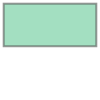

In [159]:
poly1 = mask.envelope[34]
print(poly1)
poly1

In [160]:
gdf_departement.head()

,code,nom,geometry
0,01,Ain,"POLYGON ((4.78021 46.17668, 4.78024 46.18905, ..."
1,02,Aisne,"POLYGON ((3.17296 50.01131, 3.17382 50.01186, ..."
2,03,Allier,"POLYGON ((3.03207 46.79491, 3.03424 46.79080, ..."
3,04,Alpes-de-Haute-Provence,"POLYGON ((5.67604 44.19143, 5.67817 44.19051, ..."
4,05,Hautes-Alpes,"POLYGON ((6.26057 45.12685, 6.26417 45.12641, ..."


POLYGON ((4.78021 46.17668, 4.78024 46.18905, 4.78304 46.19214, 4.78722 46.19583, 4.7932 46.20192, 4


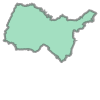

In [161]:
poly2 = gdf_departement.geometry[0]
print(str(poly2)[:100])
poly2

In [162]:
type(poly2)

shapely.geometry.polygon.Polygon

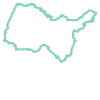

In [163]:
poly2.exterior

In [164]:
x,y = poly2.exterior.coords.xy
print(x[:10])
print(y[:10])

array('d', [4.78021, 4.78024, 4.78304, 4.78722, 4.7932, 4.79362, 4.79273, 4.79332, 4.79495, 4.79684])
array('d', [46.17668, 46.18905, 46.19214, 46.19583, 46.20192, 46.20411, 46.2075, 46.21308, 46.21938, 46.22241])


In [165]:
xy = list(poly2.exterior.coords)
xy[:10]

[(4.78021, 46.17668),
 (4.78024, 46.18905),
 (4.78304, 46.19214),
 (4.78722, 46.19583),
 (4.7932, 46.20192),
 (4.79362, 46.20411),
 (4.79273, 46.2075),
 (4.79332, 46.21308),
 (4.79495, 46.21938),
 (4.79684, 46.22241)]

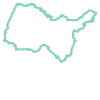

In [166]:
poly2.boundary

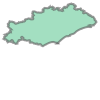

In [167]:
poly3 = gdf_departement.loc[gdf_departement.code == '34', 'geometry'].values[0]
poly3

In [168]:
type(poly3)

shapely.geometry.multipolygon.MultiPolygon

In [169]:
gdf_departement.explode().loc[34]

C:\Users\matth\AppData\Local\Temp\ipykernel_36852\3778202275.py:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  gdf_departement.explode().loc[34]


,code,nom,geometry
0,34,Hérault,"POLYGON ((3.50066 43.26290, 3.50223 43.26419, ..."
1,34,Hérault,"POLYGON ((3.35836 43.91383, 3.35827 43.91278, ..."


In [170]:
poly3_list = list(poly3.geoms)
poly3_list

[<POLYGON ((3.5 43.3, 3.5 43.3, 3.5 43.3, 3.5 43.3))>,
 <POLYGON ((3.36 43.9, 3.36 43.9, 3.36 43.9, 3.36 43.9, 3.36 43.9, 3.37 43.9,...>]

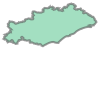

In [171]:
poly3_list[1]

### Objets shapely
classes
- Point
- LineString
- Polygon
- 

In [173]:
pt1 = shp.Point(3.4, 43.2)
print(pt1)

POINT (3.4 43.2)


In [174]:
pt2 = shp.Point([3.4, 43.2])
print(pt2)

POINT (3.4 43.2)


In [175]:
pt3 = shp.Point((3.4, 43.2))
print(pt3)

POINT (3.4 43.2)


LINESTRING (3.4 43.2, 3.7 43.2, 4 43.6)


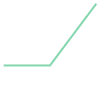

In [176]:
line1 = shp.LineString([[3.4, 43.2], [3.7, 43.2], [4.0, 43.6]])
print(line1)
line1

LINESTRING (3.4 43.2, 3.7 43.2, 4 43.6)


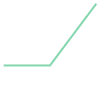

In [177]:
line2 = shp.LineString([(3.4, 43.2), (3.7, 43.2), (4.0, 43.6)])
print(line2)
line2

POLYGON ((3.4 43.2, 3.7 43.2, 4 43.6, 3.5 43.52, 3.4 43.2))


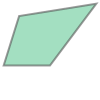

In [178]:
poly10 = shp.Polygon([[3.4, 43.2], [3.7, 43.2], [4.0, 43.6], [3.5, 43.52], [3.4, 43.2]])
print(poly10)
poly10

POLYGON ((3.4 43.2, 3.7 43.2, 4 43.6, 3.5 43.52, 3.4 43.2))


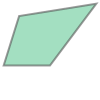

In [179]:
poly11 = shp.Polygon([[3.4, 43.2], [3.7, 43.2], [4.0, 43.6], [3.5, 43.52]])
print(poly11)
poly11

## Cartes avec plot
https://geopandas.org/en/stable/docs/user_guide/mapping.html

<Axes: >

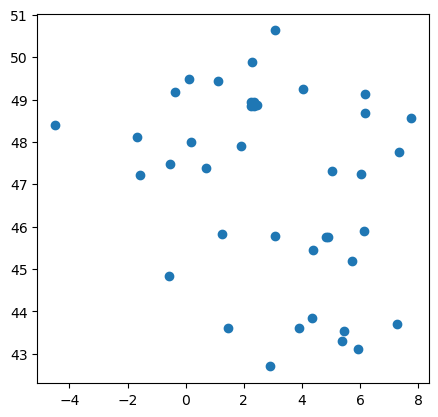

In [181]:
gdf_cities_metropole = gdf_cities[gdf_cities.dep_code != '974']
gdf_cities_metropole.plot()

<Axes: >

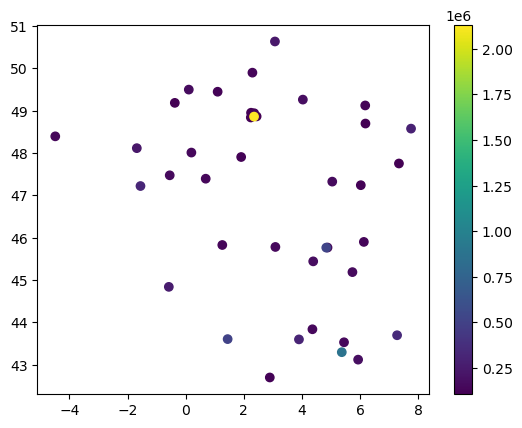

In [182]:
gdf_cities_metropole \
    .sort_values('population') \
    .plot(column='population', legend=True)

<Axes: >

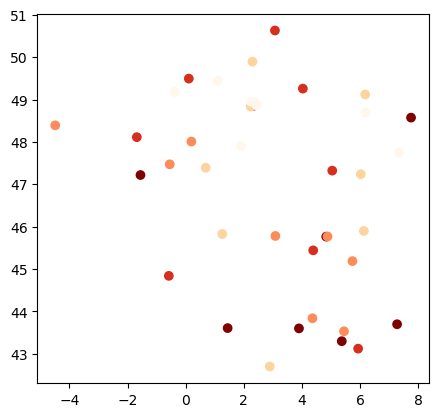

In [183]:
gdf_cities_metropole.plot(
    column='population', 
    cmap='OrRd', 
    scheme='quantiles',
)

<Axes: >

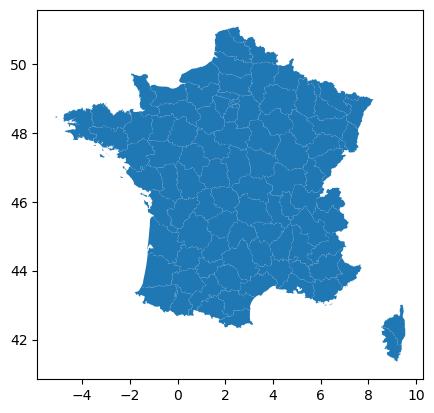

In [184]:
gdf_departement.plot()

<Axes: >

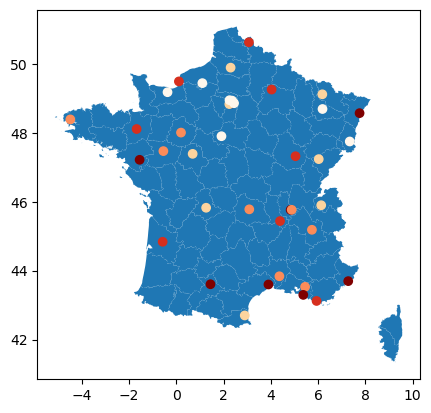

In [185]:
# ax : référence de la 1ere carte
ax = gdf_departement.plot()
# ajout sur le fond de carte d'autres éléments
gdf_cities_metropole.plot(
    ax=ax,
    column='population', 
    cmap='OrRd', 
    scheme='quantiles',
)
ax

<Axes: >

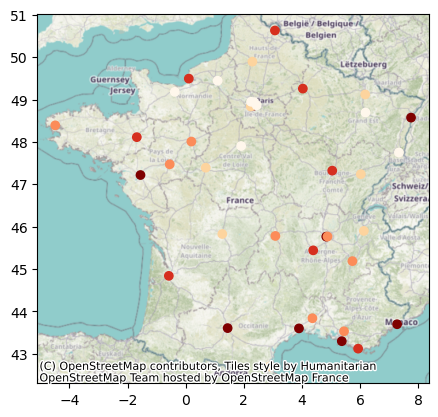

In [186]:
ax = gdf_cities_metropole.plot(
    column='population', 
    cmap='OrRd', 
    scheme='quantiles'
)
ctx.add_basemap(ax=ax, crs=gdf_cities_metropole.crs)  #, zoom=7)
ax

In [187]:
ctx.providers

{'OpenStreetMap': {'Mapnik': {'url': 'https://tile.openstreetmap.org/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.Mapnik'},
  'DE': {'url': 'https://{s}.tile.openstreetmap.de/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.DE'},
  'CH': {'url': 'https://tile.osm.ch/switzerland/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'bounds': [[45, 5], [48, 11]],
   'name': 'OpenStreetMap.CH'},
  'France': {'url': 'https://{s}.tile.openstreetmap.fr/osmfr/{z}/{x}/{y}.png',
   'max_zoom': 20,
   'html_attribution': '&copy; OpenStreetMap France | &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap France | (C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.France'},
  'HOT': {'url': 'https://{s}.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles style by <a href="https://www.hotosm.org/" target="_blank">Humanitarian OpenStreetMap Team</a> hosted by <a href="https://openstreetmap.fr/" target="_blank">OpenStreetMap France</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles style by Humanitarian OpenStreetMap Team hosted by OpenStreetMap France',
   'name': 'OpenStreetMap.HOT'},
  'BZH': {'url': 'https://tile.openstreetmap.bzh/br/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles courtesy of <a href="http://www.openstreetmap.bzh/" target="_blank">Breton OpenStreetMap Team</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles courtesy of Breton OpenStreetMap Team',
   'bounds': [[46.2, -5.5], [50, 0.7]],
   'name': 'OpenStreetMap.BZH'},
  'BlackAndWhite': {'url': 'http://{s}.tiles.wmflabs.org/bw-mapnik/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'attribution': '(C) OpenStreetMap contributors',
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'name': 'OpenStreetMap.BlackAndWhite'}},
 'MapTilesAPI': {'OSMEnglish': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'en/map/v1',
   'apikey': '<insert your api key here>',
   'max_zoom': 19,
   'name': 'MapTilesAPI.OSMEnglish'},
  'OSMFrancais': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'fr/map/v1',
   'apikey': '<insert your api key here>',
   'max_zoom': 19,
   'name': 'MapTilesAPI.OSMFrancais'},
  'OSMEspagnol': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'es/map/v1',
   'apikey': '<ins

<Axes: >

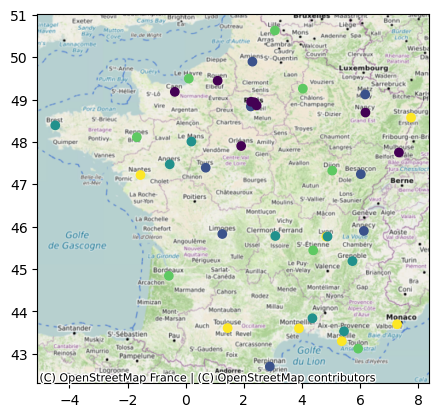

In [192]:
ax = gdf_cities_metropole.plot(
    column='population', 
    scheme='quantiles'
)
ctx.add_basemap(
    ax=ax, 
    crs=gdf_cities_metropole.crs, 
    source='OpenStreetMap.France'
)
ax

<Axes: >

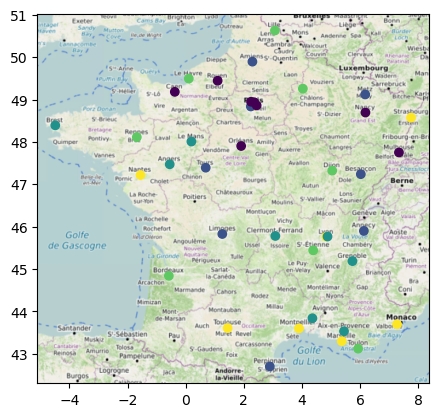

In [198]:
ax = gdf_cities_metropole.plot(
    column='population', 
    scheme='quantiles',
)
ctx.add_basemap(
    ax=ax, 
    crs=gdf_cities_metropole.crs, 
    source='https://{s}.tile.openstreetmap.fr/osmfr/{z}/{x}/{y}.png'
)
ax

In [ ]:
# TODO: filtres avec and or not